### 1. 데이터 준비하기

* 상층    Cirrocumulus(Ci) Cirrus(Cc) Cirrostratus(Cs) Contrail(Ct)
* 준층    Altostratus(Ac) Altocumulus(As)z
* 하층    Stratus(St) Stratocumulus(Sc) Nimbostratus(Ns)
* 수직운 Cumulonimbus(Cb)   Cumulusk(Cu)

In [1]:
import os
import random
import shutil

* TODO : 데이터셋 다운로드 [링크](https://www.kaggle.com/datasets/nakendraprasathk/cloud-image-classification-dataset)
* TODO : `{data_root}`에 압축풀어 넣기 (폴더명을 `data`로 변경)

In [2]:
data_root = '/Users/taeyoun/Downloads/DeepLearning/project/Image_DL_Fastcampus/Part 1/Chapter 2. Multi Class Classification _ 두 개 이상의 선택지에서 하나의 객체만을 분류할 수 있는 분류 방법/실습 파일/가중치 파일/b08. 구름 분류'
file_root = f"{data_root}/data/train"

train_root = f"{data_root}/train"
valid_root = f"{data_root}/valid"
test_root = f"{data_root}/test"

cls_list = os.listdir(file_root)


for folder in [train_root, valid_root, test_root]:
    if not os.path.exists(folder):
        os.makedirs(folder)
    for cls in cls_list:
        cls_folder = f"{folder}/{cls}"
        if not os.path.exists(cls_folder):
            os.makedirs(cls_folder)

In [3]:
# random.seed(2024)
# shutil.copytree(f"{data_root}/data/test", f"{data_root}/test", dirs_exist_ok=True)
# for cls in cls_list:
#     file_list = os.listdir(f"{file_root}/{cls}")
#     random.shuffle(file_list)
#     test_ratio = 0.1
#     num_file = len(file_list)

#     test_list = file_list[:int(num_file*test_ratio)]
#     valid_list = file_list[int(num_file*test_ratio):int(num_file*test_ratio)*2]
#     train_list = file_list[int(num_file*test_ratio)*2:]

#     for i in test_list:
#         shutil.copyfile(f"{file_root}/{cls}/{i}", f"{test_root}/{cls}/{i}" )

#     for i in valid_list:
#         shutil.copyfile(f"{file_root}/{cls}/{i}", f"{valid_root}/{cls}/{i}" )

#     for i in train_list:
#         shutil.copyfile(f"{file_root}/{cls}/{i}", f"{train_root}/{cls}/{i}" )


In [6]:
import matplotlib.pyplot as plt
import glob
from PIL import Image

test_file_list = glob.glob(f"{test_root}/*/*")
random.shuffle(test_file_list)
print(test_file_list)

['/Users/taeyoun/Downloads/DeepLearning/project/Image_DL_Fastcampus/Part 1/Chapter 2. Multi Class Classification _ 두 개 이상의 선택지에서 하나의 객체만을 분류할 수 있는 분류 방법/실습 파일/가중치 파일/b08. 구름 분류/test/Cc/Cc-N083.jpg', '/Users/taeyoun/Downloads/DeepLearning/project/Image_DL_Fastcampus/Part 1/Chapter 2. Multi Class Classification _ 두 개 이상의 선택지에서 하나의 객체만을 분류할 수 있는 분류 방법/실습 파일/가중치 파일/b08. 구름 분류/test/Cs/Cs-N151.jpg', '/Users/taeyoun/Downloads/DeepLearning/project/Image_DL_Fastcampus/Part 1/Chapter 2. Multi Class Classification _ 두 개 이상의 선택지에서 하나의 객체만을 분류할 수 있는 분류 방법/실습 파일/가중치 파일/b08. 구름 분류/test/Cc/Cc-N032.jpg', '/Users/taeyoun/Downloads/DeepLearning/project/Image_DL_Fastcampus/Part 1/Chapter 2. Multi Class Classification _ 두 개 이상의 선택지에서 하나의 객체만을 분류할 수 있는 분류 방법/실습 파일/가중치 파일/b08. ᄀ

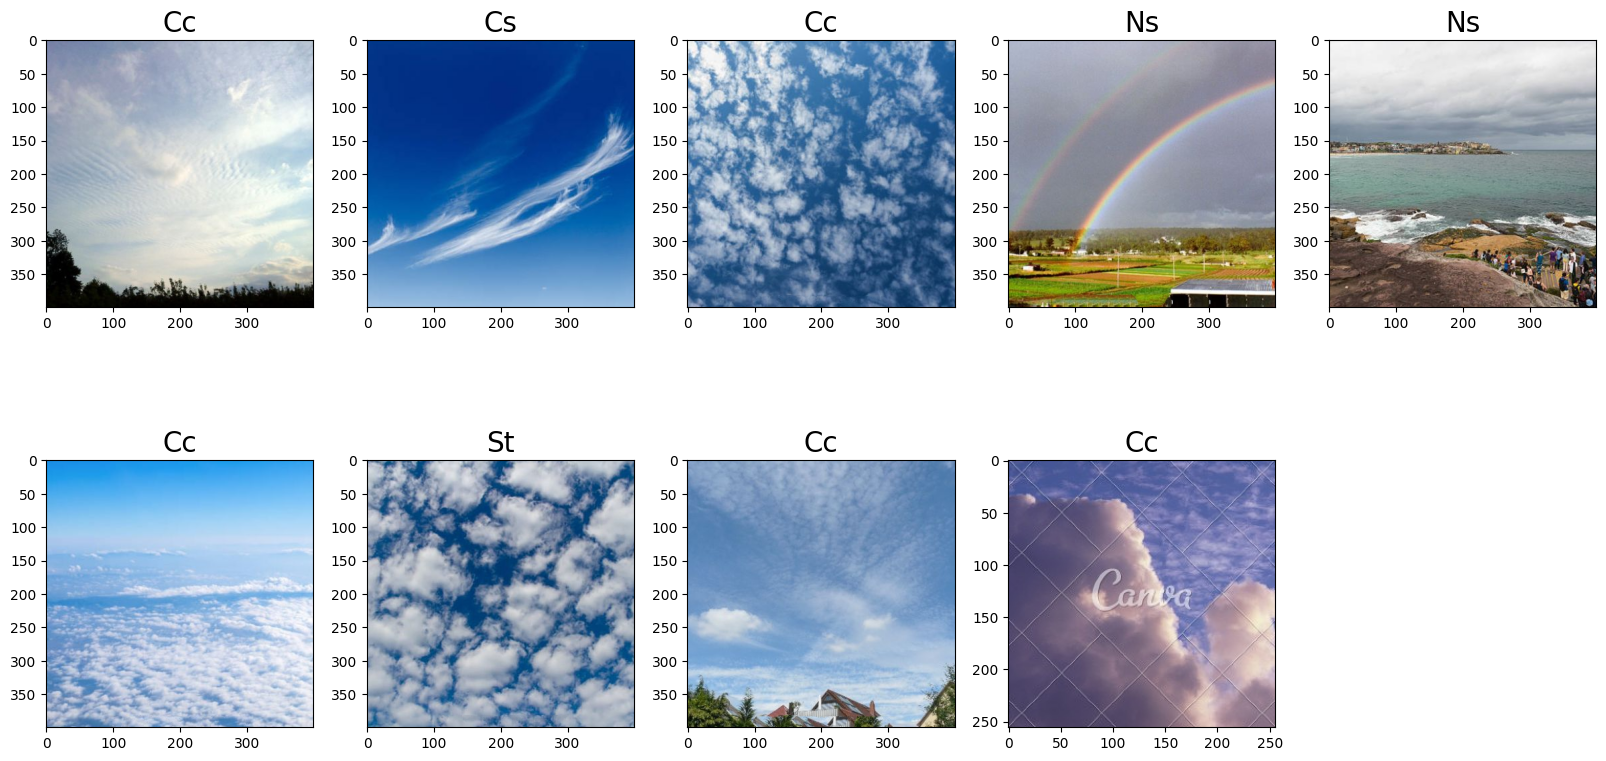

In [13]:

plt.figure(figsize = (20,10))
for i in range(9):
    test_img_path = os.path.join(test_root, test_file_list[i])
    ori_img = Image.open(test_img_path).convert('RGB')
    plt.subplot(2, 5, (i+1))
    plt.title(test_file_list[i].split('/')[-2], fontsize=20)
    plt.imshow(ori_img)

plt.show()

### 2. 데이터 전처리

In [3]:
import os
import torch
import torchvision
from torchvision import datasets, models, transforms

In [11]:
IMG_SIZE = 64

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(IMG_SIZE),
        transforms.RandomApply([transforms.RandomHorizontalFlip(0.5),
        transforms.RandomRotation(degrees=(-15, 15), ),
        transforms.RandomAffine(degrees = 0, translate = (0.1, 0.1))]),
        transforms.ColorJitter(brightness=(0.5, 0.9), contrast=(0.4, 0.8), saturation=(0.7, 0.9),hue=(-0.2, 0.2)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(IMG_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(IMG_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [12]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_root, x),
                                          data_transforms[x])
                  for x in ['train', 'valid', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'valid', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid', 'test']}
class_names = image_datasets['train'].classes


print(dataset_sizes)
print(class_names)

cuda:0
{'train': 1867, 'valid': 228, 'test': 228}


### 3. Training

In [13]:
import os
import torch
import torch.nn.functional as F
from tempfile import TemporaryDirectory
from time import time
from tqdm import tqdm
import timm

import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.optim import lr_scheduler

In [14]:
def train_model(model, criterion, optimizer, scheduler, dataloaders, dataset_sizes, device, model_dir, model_name, num_epochs=25):
    print(device)
    since = time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0
        train_loss = []
        train_acc = []
        valid_loss = []
        valid_acc = []
        
        for epoch in range(num_epochs):
            print(f'Epoch {epoch+1}/{num_epochs}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'valid']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in tqdm(dataloaders[phase]):
                    inputs = inputs.to(device)
                    # print(inputs.shape)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if scheduler is not None and phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]


                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
                if phase == 'train':
                    train_loss.append(epoch_loss)
                    train_acc.append(epoch_acc.item())
                else:
                    valid_loss.append(epoch_loss)
                    valid_acc.append(epoch_acc.item())
                    if epoch_acc > best_acc:
                        best_acc = epoch_acc
                        
                        if not os.path.exists(model_dir):
                            os.makedirs(model_dir)
                        
                        model_save_path = os.path.join(model_dir, f'{model_name}.pth')
                        torch.save(model.state_dict(), model_save_path)

            print()

        time_elapsed = time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:.4f}')
    
    return [train_loss, valid_loss, train_acc, valid_acc]

* TODO : `pjt_root`에 학습한 결과를 저장하고 싶은 경로 넣어주기

In [29]:
pjt_root = "C:/Users/ /Documents/Image_classification/project/m08.cloud_classification"
model_dir = f"{pjt_root}/models"
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)
NUM_EPOCHS = 200

cuda:0


In [30]:
num_class = len(os.listdir(train_root))
print(f"Number of Class : {num_class}")
resnet18_model = timm.create_model('resnet18',pretrained=True,num_classes=num_class).to(DEVICE)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(resnet18_model.parameters(), lr=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9)

Number of Class : 11


In [31]:
num_epochs = NUM_EPOCHS
resnet18 = train_model(resnet18_model, criterion, optimizer,scheduler, dataloaders, dataset_sizes, DEVICE, model_dir, 'cloud_resnet18', num_epochs =num_epochs) 

cuda:0
Epoch 1/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.28it/s]


train Loss: 2.3819 Acc: 0.1430


100%|██████████| 15/15 [00:03<00:00,  4.64it/s]


valid Loss: 2.3396 Acc: 0.1798

Epoch 2/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.81it/s]


train Loss: 2.2823 Acc: 0.1934


100%|██████████| 15/15 [00:03<00:00,  4.84it/s]


valid Loss: 2.2409 Acc: 0.2325

Epoch 3/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.77it/s]


train Loss: 2.2159 Acc: 0.2426


100%|██████████| 15/15 [00:03<00:00,  4.50it/s]


valid Loss: 2.1890 Acc: 0.2500

Epoch 4/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.50it/s]


train Loss: 2.1128 Acc: 0.2871


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 2.1070 Acc: 0.2719

Epoch 5/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.32it/s]


train Loss: 2.0272 Acc: 0.3101


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.0014 Acc: 0.2807

Epoch 6/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.62it/s]


train Loss: 1.9600 Acc: 0.3374


100%|██████████| 15/15 [00:03<00:00,  4.48it/s]


valid Loss: 1.9702 Acc: 0.3377

Epoch 7/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.83it/s]


train Loss: 1.9068 Acc: 0.3476


100%|██████████| 15/15 [00:03<00:00,  4.49it/s]


valid Loss: 1.9085 Acc: 0.3684

Epoch 8/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.21it/s]


train Loss: 1.8612 Acc: 0.3701


100%|██████████| 15/15 [00:03<00:00,  4.92it/s]


valid Loss: 1.9332 Acc: 0.3509

Epoch 9/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.08it/s]


train Loss: 1.8219 Acc: 0.3760


100%|██████████| 15/15 [00:03<00:00,  4.47it/s]


valid Loss: 1.8766 Acc: 0.3991

Epoch 10/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.15it/s]


train Loss: 1.7890 Acc: 0.3814


100%|██████████| 15/15 [00:03<00:00,  4.92it/s]


valid Loss: 1.7904 Acc: 0.4518

Epoch 11/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.55it/s]


train Loss: 1.7350 Acc: 0.4119


100%|██████████| 15/15 [00:03<00:00,  4.72it/s]


valid Loss: 1.7868 Acc: 0.4342

Epoch 12/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.99it/s]


train Loss: 1.7224 Acc: 0.4114


100%|██████████| 15/15 [00:03<00:00,  4.76it/s]


valid Loss: 1.7828 Acc: 0.3991

Epoch 13/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.98it/s]


train Loss: 1.6879 Acc: 0.4156


100%|██████████| 15/15 [00:03<00:00,  4.51it/s]


valid Loss: 1.7569 Acc: 0.4298

Epoch 14/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.62it/s]


train Loss: 1.6777 Acc: 0.4290


100%|██████████| 15/15 [00:03<00:00,  4.50it/s]


valid Loss: 1.7538 Acc: 0.4035

Epoch 15/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.14it/s]


train Loss: 1.6587 Acc: 0.4151


100%|██████████| 15/15 [00:03<00:00,  4.77it/s]


valid Loss: 1.7564 Acc: 0.4254

Epoch 16/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.88it/s]


train Loss: 1.6295 Acc: 0.4301


100%|██████████| 15/15 [00:03<00:00,  4.43it/s]


valid Loss: 1.7408 Acc: 0.4167

Epoch 17/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.34it/s]


train Loss: 1.5816 Acc: 0.4499


100%|██████████| 15/15 [00:03<00:00,  4.66it/s]


valid Loss: 1.7552 Acc: 0.4167

Epoch 18/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.45it/s]


train Loss: 1.6060 Acc: 0.4456


100%|██████████| 15/15 [00:03<00:00,  4.02it/s]


valid Loss: 1.7584 Acc: 0.4123

Epoch 19/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.04it/s]


train Loss: 1.5578 Acc: 0.4563


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 1.7459 Acc: 0.4167

Epoch 20/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.94it/s]


train Loss: 1.5495 Acc: 0.4724


100%|██████████| 15/15 [00:03<00:00,  4.65it/s]


valid Loss: 1.7436 Acc: 0.4211

Epoch 21/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.16it/s]


train Loss: 1.4980 Acc: 0.4719


100%|██████████| 15/15 [00:03<00:00,  4.79it/s]


valid Loss: 1.7049 Acc: 0.4518

Epoch 22/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.60it/s]


train Loss: 1.5368 Acc: 0.4788


100%|██████████| 15/15 [00:03<00:00,  4.52it/s]


valid Loss: 1.7039 Acc: 0.4298

Epoch 23/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.70it/s]


train Loss: 1.4658 Acc: 0.5008


100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


valid Loss: 1.7506 Acc: 0.4167

Epoch 24/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.52it/s]


train Loss: 1.4773 Acc: 0.4799


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 1.6982 Acc: 0.4605

Epoch 25/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.48it/s]


train Loss: 1.4578 Acc: 0.4965


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 1.7098 Acc: 0.4518

Epoch 26/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.53it/s]


train Loss: 1.4449 Acc: 0.5067


100%|██████████| 15/15 [00:02<00:00,  5.12it/s]


valid Loss: 1.7437 Acc: 0.4518

Epoch 27/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.45it/s]


train Loss: 1.4368 Acc: 0.4976


100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


valid Loss: 1.7283 Acc: 0.4254

Epoch 28/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.87it/s]


train Loss: 1.4220 Acc: 0.5121


100%|██████████| 15/15 [00:03<00:00,  4.80it/s]


valid Loss: 1.7260 Acc: 0.4167

Epoch 29/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.77it/s]


train Loss: 1.4044 Acc: 0.4981


100%|██████████| 15/15 [00:03<00:00,  4.43it/s]


valid Loss: 1.7209 Acc: 0.4474

Epoch 30/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.20it/s]


train Loss: 1.4162 Acc: 0.5179


100%|██████████| 15/15 [00:03<00:00,  4.81it/s]


valid Loss: 1.7159 Acc: 0.4649

Epoch 31/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.11it/s]


train Loss: 1.3687 Acc: 0.5265


100%|██████████| 15/15 [00:03<00:00,  4.89it/s]


valid Loss: 1.7407 Acc: 0.4342

Epoch 32/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.22it/s]


train Loss: 1.3638 Acc: 0.5340


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 1.7132 Acc: 0.4386

Epoch 33/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.95it/s]


train Loss: 1.3516 Acc: 0.5372


100%|██████████| 15/15 [00:03<00:00,  4.89it/s]


valid Loss: 1.7064 Acc: 0.4342

Epoch 34/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.21it/s]


train Loss: 1.3317 Acc: 0.5324


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 1.7255 Acc: 0.4342

Epoch 35/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.21it/s]


train Loss: 1.3219 Acc: 0.5410


100%|██████████| 15/15 [00:02<00:00,  5.15it/s]


valid Loss: 1.7480 Acc: 0.4561

Epoch 36/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.35it/s]


train Loss: 1.3040 Acc: 0.5635


100%|██████████| 15/15 [00:03<00:00,  4.89it/s]


valid Loss: 1.7457 Acc: 0.4298

Epoch 37/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.27it/s]


train Loss: 1.2741 Acc: 0.5587


100%|██████████| 15/15 [00:03<00:00,  4.62it/s]


valid Loss: 1.7717 Acc: 0.4474

Epoch 38/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.96it/s]


train Loss: 1.2551 Acc: 0.5699


100%|██████████| 15/15 [00:03<00:00,  4.71it/s]


valid Loss: 1.7811 Acc: 0.4211

Epoch 39/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.16it/s]


train Loss: 1.2487 Acc: 0.5624


100%|██████████| 15/15 [00:02<00:00,  5.16it/s]


valid Loss: 1.7920 Acc: 0.4474

Epoch 40/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.25it/s]


train Loss: 1.2527 Acc: 0.5661


100%|██████████| 15/15 [00:02<00:00,  5.10it/s]


valid Loss: 1.7654 Acc: 0.4254

Epoch 41/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.18it/s]


train Loss: 1.2516 Acc: 0.5779


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 1.7215 Acc: 0.4693

Epoch 42/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.21it/s]


train Loss: 1.1977 Acc: 0.5881


100%|██████████| 15/15 [00:02<00:00,  5.16it/s]


valid Loss: 1.7574 Acc: 0.4386

Epoch 43/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.43it/s]


train Loss: 1.2017 Acc: 0.5967


100%|██████████| 15/15 [00:03<00:00,  4.89it/s]


valid Loss: 1.8103 Acc: 0.4123

Epoch 44/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.12it/s]


train Loss: 1.1723 Acc: 0.6015


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 1.8070 Acc: 0.4167

Epoch 45/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.36it/s]


train Loss: 1.1407 Acc: 0.6026


100%|██████████| 15/15 [00:03<00:00,  4.73it/s]


valid Loss: 1.8341 Acc: 0.4298

Epoch 46/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.89it/s]


train Loss: 1.1875 Acc: 0.5961


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 1.7996 Acc: 0.4167

Epoch 47/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.35it/s]


train Loss: 1.1489 Acc: 0.6197


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 1.8228 Acc: 0.4474

Epoch 48/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.12it/s]


train Loss: 1.1567 Acc: 0.6069


100%|██████████| 15/15 [00:03<00:00,  4.86it/s]


valid Loss: 1.8241 Acc: 0.4430

Epoch 49/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.08it/s]


train Loss: 1.1221 Acc: 0.6160


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 1.8491 Acc: 0.4430

Epoch 50/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.24it/s]


train Loss: 1.1210 Acc: 0.6213


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 1.8516 Acc: 0.4167

Epoch 51/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.23it/s]


train Loss: 1.1174 Acc: 0.6079


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 1.8608 Acc: 0.4298

Epoch 52/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.20it/s]


train Loss: 1.0897 Acc: 0.6342


100%|██████████| 15/15 [00:03<00:00,  4.83it/s]


valid Loss: 1.8083 Acc: 0.4167

Epoch 53/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.33it/s]


train Loss: 1.0684 Acc: 0.6358


100%|██████████| 15/15 [00:03<00:00,  4.91it/s]


valid Loss: 1.8197 Acc: 0.4386

Epoch 54/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.29it/s]


train Loss: 1.0659 Acc: 0.6331


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 1.9003 Acc: 0.3947

Epoch 55/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.15it/s]


train Loss: 1.0816 Acc: 0.6240


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 1.9128 Acc: 0.3816

Epoch 56/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.16it/s]


train Loss: 1.0657 Acc: 0.6261


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 1.9280 Acc: 0.3947

Epoch 57/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.21it/s]


train Loss: 1.0278 Acc: 0.6460


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 1.8412 Acc: 0.4211

Epoch 58/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.26it/s]


train Loss: 1.0568 Acc: 0.6320


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 1.8663 Acc: 0.4298

Epoch 59/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.15it/s]


train Loss: 1.0033 Acc: 0.6518


100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


valid Loss: 1.8776 Acc: 0.4035

Epoch 60/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.06it/s]


train Loss: 1.0163 Acc: 0.6502


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 1.9100 Acc: 0.4211

Epoch 61/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.28it/s]


train Loss: 0.9823 Acc: 0.6540


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 1.8763 Acc: 0.4386

Epoch 62/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.36it/s]


train Loss: 0.9930 Acc: 0.6647


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 1.9053 Acc: 0.4211

Epoch 63/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.29it/s]


train Loss: 0.9959 Acc: 0.6695


100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


valid Loss: 1.9282 Acc: 0.4298

Epoch 64/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.22it/s]


train Loss: 0.9899 Acc: 0.6615


100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


valid Loss: 1.9173 Acc: 0.4254

Epoch 65/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.36it/s]


train Loss: 0.9735 Acc: 0.6749


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 1.9330 Acc: 0.4430

Epoch 66/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.14it/s]


train Loss: 0.9624 Acc: 0.6760


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 1.9591 Acc: 0.4254

Epoch 67/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.16it/s]


train Loss: 0.9564 Acc: 0.6727


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 2.0005 Acc: 0.4123

Epoch 68/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.31it/s]


train Loss: 0.9823 Acc: 0.6551


100%|██████████| 15/15 [00:02<00:00,  5.14it/s]


valid Loss: 2.0070 Acc: 0.4079

Epoch 69/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.18it/s]


train Loss: 0.9508 Acc: 0.6733


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.0367 Acc: 0.4079

Epoch 70/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.29it/s]


train Loss: 0.9366 Acc: 0.6851


100%|██████████| 15/15 [00:03<00:00,  4.90it/s]


valid Loss: 2.0336 Acc: 0.3860

Epoch 71/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.98it/s]


train Loss: 0.9580 Acc: 0.6738


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.0247 Acc: 0.3860

Epoch 72/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.36it/s]


train Loss: 0.9180 Acc: 0.6899


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 2.0415 Acc: 0.3860

Epoch 73/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.20it/s]


train Loss: 0.9183 Acc: 0.7011


100%|██████████| 15/15 [00:03<00:00,  4.90it/s]


valid Loss: 2.0398 Acc: 0.4079

Epoch 74/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.33it/s]


train Loss: 0.9046 Acc: 0.6920


100%|██████████| 15/15 [00:03<00:00,  4.87it/s]


valid Loss: 2.1177 Acc: 0.3991

Epoch 75/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.18it/s]


train Loss: 0.8841 Acc: 0.6947


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.0233 Acc: 0.3904

Epoch 76/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.29it/s]


train Loss: 0.9020 Acc: 0.6834


100%|██████████| 15/15 [00:03<00:00,  4.92it/s]


valid Loss: 2.0166 Acc: 0.4123

Epoch 77/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.27it/s]


train Loss: 0.8874 Acc: 0.6958


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.0598 Acc: 0.4211

Epoch 78/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.12it/s]


train Loss: 0.8908 Acc: 0.6979


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.0626 Acc: 0.4211

Epoch 79/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.23it/s]


train Loss: 0.8854 Acc: 0.6942


100%|██████████| 15/15 [00:03<00:00,  4.91it/s]


valid Loss: 2.0836 Acc: 0.4123

Epoch 80/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.17it/s]


train Loss: 0.8605 Acc: 0.7102


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 2.1161 Acc: 0.3991

Epoch 81/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.21it/s]


train Loss: 0.8464 Acc: 0.7161


100%|██████████| 15/15 [00:03<00:00,  4.87it/s]


valid Loss: 2.1123 Acc: 0.3860

Epoch 82/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.20it/s]


train Loss: 0.8523 Acc: 0.7108


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 2.0816 Acc: 0.3860

Epoch 83/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.17it/s]


train Loss: 0.8907 Acc: 0.6904


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.0939 Acc: 0.3947

Epoch 84/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.07it/s]


train Loss: 0.8325 Acc: 0.7140


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 2.1300 Acc: 0.3904

Epoch 85/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.90it/s]


train Loss: 0.8492 Acc: 0.7065


100%|██████████| 15/15 [00:03<00:00,  4.68it/s]


valid Loss: 2.1242 Acc: 0.3947

Epoch 86/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.26it/s]


train Loss: 0.8163 Acc: 0.7220


100%|██████████| 15/15 [00:02<00:00,  5.10it/s]


valid Loss: 2.1267 Acc: 0.3860

Epoch 87/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.30it/s]


train Loss: 0.8049 Acc: 0.7252


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.0448 Acc: 0.4123

Epoch 88/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.25it/s]


train Loss: 0.8213 Acc: 0.7258


100%|██████████| 15/15 [00:03<00:00,  4.91it/s]


valid Loss: 2.1845 Acc: 0.3860

Epoch 89/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.38it/s]


train Loss: 0.8097 Acc: 0.7274


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.1119 Acc: 0.4211

Epoch 90/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.29it/s]


train Loss: 0.7954 Acc: 0.7290


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.1554 Acc: 0.3728

Epoch 91/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.29it/s]


train Loss: 0.8045 Acc: 0.7284


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.1746 Acc: 0.4123

Epoch 92/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.16it/s]


train Loss: 0.7915 Acc: 0.7322


100%|██████████| 15/15 [00:02<00:00,  5.11it/s]


valid Loss: 2.2154 Acc: 0.3728

Epoch 93/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.32it/s]


train Loss: 0.7782 Acc: 0.7450


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 2.1556 Acc: 0.3684

Epoch 94/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.31it/s]


train Loss: 0.7924 Acc: 0.7242


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.2036 Acc: 0.3991

Epoch 95/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.16it/s]


train Loss: 0.7570 Acc: 0.7456


100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


valid Loss: 2.1992 Acc: 0.3684

Epoch 96/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.23it/s]


train Loss: 0.7655 Acc: 0.7429


100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


valid Loss: 2.1837 Acc: 0.3947

Epoch 97/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.35it/s]


train Loss: 0.7721 Acc: 0.7381


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.1812 Acc: 0.4123

Epoch 98/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.31it/s]


train Loss: 0.7622 Acc: 0.7402


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.1964 Acc: 0.3860

Epoch 99/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.24it/s]


train Loss: 0.7449 Acc: 0.7461


100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


valid Loss: 2.2236 Acc: 0.3816

Epoch 100/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.39it/s]


train Loss: 0.7233 Acc: 0.7531


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.1924 Acc: 0.4035

Epoch 101/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.35it/s]


train Loss: 0.7425 Acc: 0.7461


100%|██████████| 15/15 [00:03<00:00,  4.44it/s]


valid Loss: 2.2100 Acc: 0.3904

Epoch 102/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.50it/s]


train Loss: 0.7581 Acc: 0.7429


100%|██████████| 15/15 [00:03<00:00,  4.42it/s]


valid Loss: 2.1885 Acc: 0.3772

Epoch 103/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.24it/s]


train Loss: 0.7265 Acc: 0.7616


100%|██████████| 15/15 [00:03<00:00,  4.88it/s]


valid Loss: 2.1608 Acc: 0.4035

Epoch 104/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.01it/s]


train Loss: 0.7550 Acc: 0.7472


100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


valid Loss: 2.1498 Acc: 0.4123

Epoch 105/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.39it/s]


train Loss: 0.7136 Acc: 0.7665


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.2088 Acc: 0.3904

Epoch 106/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.30it/s]


train Loss: 0.7386 Acc: 0.7429


100%|██████████| 15/15 [00:03<00:00,  4.87it/s]


valid Loss: 2.2173 Acc: 0.4342

Epoch 107/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.27it/s]


train Loss: 0.7361 Acc: 0.7525


100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


valid Loss: 2.2350 Acc: 0.3991

Epoch 108/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.39it/s]


train Loss: 0.7255 Acc: 0.7493


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.2197 Acc: 0.3860

Epoch 109/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.36it/s]


train Loss: 0.7359 Acc: 0.7568


100%|██████████| 15/15 [00:03<00:00,  4.88it/s]


valid Loss: 2.2289 Acc: 0.3728

Epoch 110/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.04it/s]


train Loss: 0.7195 Acc: 0.7579


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 2.2475 Acc: 0.3904

Epoch 111/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.36it/s]


train Loss: 0.7246 Acc: 0.7606


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.3390 Acc: 0.3728

Epoch 112/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.29it/s]


train Loss: 0.7367 Acc: 0.7579


100%|██████████| 15/15 [00:03<00:00,  4.89it/s]


valid Loss: 2.2883 Acc: 0.4035

Epoch 113/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.21it/s]


train Loss: 0.7013 Acc: 0.7525


100%|██████████| 15/15 [00:02<00:00,  5.00it/s]


valid Loss: 2.2970 Acc: 0.3640

Epoch 114/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.21it/s]


train Loss: 0.6966 Acc: 0.7681


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 2.2258 Acc: 0.4079

Epoch 115/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.30it/s]


train Loss: 0.7048 Acc: 0.7600


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 2.2598 Acc: 0.4123

Epoch 116/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.16it/s]


train Loss: 0.7073 Acc: 0.7590


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.2593 Acc: 0.4298

Epoch 117/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.28it/s]


train Loss: 0.6612 Acc: 0.7788


100%|██████████| 15/15 [00:03<00:00,  4.74it/s]


valid Loss: 2.2210 Acc: 0.4298

Epoch 118/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.33it/s]


train Loss: 0.6748 Acc: 0.7654


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.2167 Acc: 0.4342

Epoch 119/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.31it/s]


train Loss: 0.6829 Acc: 0.7718


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 2.3255 Acc: 0.3904

Epoch 120/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.98it/s]


train Loss: 0.6849 Acc: 0.7831


100%|██████████| 15/15 [00:03<00:00,  4.80it/s]


valid Loss: 2.2761 Acc: 0.3947

Epoch 121/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.11it/s]


train Loss: 0.6475 Acc: 0.7895


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 2.2549 Acc: 0.4035

Epoch 122/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.34it/s]


train Loss: 0.6528 Acc: 0.7890


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 2.2850 Acc: 0.3684

Epoch 123/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.23it/s]


train Loss: 0.6540 Acc: 0.7836


100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


valid Loss: 2.2574 Acc: 0.3947

Epoch 124/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.22it/s]


train Loss: 0.6492 Acc: 0.7906


100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


valid Loss: 2.2652 Acc: 0.3772

Epoch 125/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.95it/s]


train Loss: 0.6720 Acc: 0.7831


100%|██████████| 15/15 [00:03<00:00,  4.89it/s]


valid Loss: 2.3122 Acc: 0.3816

Epoch 126/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.31it/s]


train Loss: 0.6949 Acc: 0.7729


100%|██████████| 15/15 [00:02<00:00,  5.17it/s]


valid Loss: 2.2931 Acc: 0.3772

Epoch 127/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.27it/s]


train Loss: 0.6481 Acc: 0.7772


100%|██████████| 15/15 [00:02<00:00,  5.10it/s]


valid Loss: 2.2672 Acc: 0.3816

Epoch 128/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.30it/s]


train Loss: 0.6541 Acc: 0.7766


100%|██████████| 15/15 [00:03<00:00,  4.85it/s]


valid Loss: 2.2764 Acc: 0.4123

Epoch 129/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.37it/s]


train Loss: 0.6689 Acc: 0.7783


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.3164 Acc: 0.3991

Epoch 130/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.14it/s]


train Loss: 0.6670 Acc: 0.7783


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 2.3372 Acc: 0.3860

Epoch 131/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.37it/s]


train Loss: 0.6757 Acc: 0.7745


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.3062 Acc: 0.3991

Epoch 132/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.01it/s]


train Loss: 0.6339 Acc: 0.7783


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.3337 Acc: 0.3772

Epoch 133/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.38it/s]


train Loss: 0.6166 Acc: 0.8034


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.2656 Acc: 0.3991

Epoch 134/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.34it/s]


train Loss: 0.6032 Acc: 0.8029


100%|██████████| 15/15 [00:02<00:00,  5.12it/s]


valid Loss: 2.2540 Acc: 0.3860

Epoch 135/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.30it/s]


train Loss: 0.6303 Acc: 0.7927


100%|██████████| 15/15 [00:03<00:00,  4.77it/s]


valid Loss: 2.2575 Acc: 0.3860

Epoch 136/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.31it/s]


train Loss: 0.6349 Acc: 0.8045


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.2605 Acc: 0.3904

Epoch 137/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.39it/s]


train Loss: 0.6288 Acc: 0.7900


100%|██████████| 15/15 [00:03<00:00,  4.91it/s]


valid Loss: 2.2522 Acc: 0.4211

Epoch 138/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.27it/s]


train Loss: 0.6396 Acc: 0.7809


100%|██████████| 15/15 [00:03<00:00,  4.91it/s]


valid Loss: 2.2841 Acc: 0.3947

Epoch 139/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.92it/s]


train Loss: 0.6108 Acc: 0.7895


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.2259 Acc: 0.3816

Epoch 140/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.52it/s]


train Loss: 0.6407 Acc: 0.7729


100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


valid Loss: 2.2467 Acc: 0.4079

Epoch 141/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.43it/s]


train Loss: 0.6200 Acc: 0.7975


100%|██████████| 15/15 [00:02<00:00,  5.16it/s]


valid Loss: 2.2632 Acc: 0.4035

Epoch 142/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.38it/s]


train Loss: 0.5955 Acc: 0.7997


100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


valid Loss: 2.3123 Acc: 0.3684

Epoch 143/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.40it/s]


train Loss: 0.6477 Acc: 0.7831


100%|██████████| 15/15 [00:03<00:00,  4.07it/s]


valid Loss: 2.3237 Acc: 0.3728

Epoch 144/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.15it/s]


train Loss: 0.6535 Acc: 0.7804


100%|██████████| 15/15 [00:03<00:00,  4.70it/s]


valid Loss: 2.2605 Acc: 0.3947

Epoch 145/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.45it/s]


train Loss: 0.6361 Acc: 0.7884


100%|██████████| 15/15 [00:03<00:00,  4.23it/s]


valid Loss: 2.2886 Acc: 0.3860

Epoch 146/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.45it/s]


train Loss: 0.5858 Acc: 0.8029


100%|██████████| 15/15 [00:03<00:00,  4.82it/s]


valid Loss: 2.3201 Acc: 0.4035

Epoch 147/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.28it/s]


train Loss: 0.6106 Acc: 0.7927


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 2.3101 Acc: 0.3991

Epoch 148/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.31it/s]


train Loss: 0.5940 Acc: 0.7959


100%|██████████| 15/15 [00:02<00:00,  5.09it/s]


valid Loss: 2.3071 Acc: 0.4211

Epoch 149/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.15it/s]


train Loss: 0.6178 Acc: 0.7906


100%|██████████| 15/15 [00:03<00:00,  4.85it/s]


valid Loss: 2.3412 Acc: 0.3947

Epoch 150/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.93it/s]


train Loss: 0.6113 Acc: 0.7933


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.4307 Acc: 0.3991

Epoch 151/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.26it/s]


train Loss: 0.5975 Acc: 0.7991


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.3398 Acc: 0.3947

Epoch 152/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.16it/s]


train Loss: 0.6216 Acc: 0.7943


100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


valid Loss: 2.3254 Acc: 0.3991

Epoch 153/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.31it/s]


train Loss: 0.5924 Acc: 0.8066


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 2.3711 Acc: 0.3860

Epoch 154/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.36it/s]


train Loss: 0.5866 Acc: 0.8056


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.4046 Acc: 0.3772

Epoch 155/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.40it/s]


train Loss: 0.5886 Acc: 0.7954


100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


valid Loss: 2.3075 Acc: 0.3772

Epoch 156/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.46it/s]


train Loss: 0.6097 Acc: 0.7906


100%|██████████| 15/15 [00:02<00:00,  5.14it/s]


valid Loss: 2.3484 Acc: 0.4035

Epoch 157/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.98it/s]


train Loss: 0.5829 Acc: 0.8099


100%|██████████| 15/15 [00:02<00:00,  5.15it/s]


valid Loss: 2.2947 Acc: 0.4123

Epoch 158/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.35it/s]


train Loss: 0.6305 Acc: 0.7831


100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


valid Loss: 2.3637 Acc: 0.3947

Epoch 159/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.37it/s]


train Loss: 0.5624 Acc: 0.8109


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.3787 Acc: 0.3816

Epoch 160/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.42it/s]


train Loss: 0.5690 Acc: 0.7991


100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


valid Loss: 2.4339 Acc: 0.3860

Epoch 161/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.37it/s]


train Loss: 0.5827 Acc: 0.8040


100%|██████████| 15/15 [00:03<00:00,  4.78it/s]


valid Loss: 2.3198 Acc: 0.4123

Epoch 162/200
----------


100%|██████████| 117/117 [00:10<00:00, 10.96it/s]


train Loss: 0.5763 Acc: 0.8056


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 2.3753 Acc: 0.3904

Epoch 163/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.42it/s]


train Loss: 0.5856 Acc: 0.7997


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 2.4061 Acc: 0.3816

Epoch 164/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.11it/s]


train Loss: 0.5682 Acc: 0.8174


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.3297 Acc: 0.4342

Epoch 165/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.28it/s]


train Loss: 0.6042 Acc: 0.7916


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.3906 Acc: 0.4079

Epoch 166/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.39it/s]


train Loss: 0.6160 Acc: 0.7938


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.3931 Acc: 0.3860

Epoch 167/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.42it/s]


train Loss: 0.5909 Acc: 0.8077


100%|██████████| 15/15 [00:03<00:00,  4.78it/s]


valid Loss: 2.3632 Acc: 0.3904

Epoch 168/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.37it/s]


train Loss: 0.5555 Acc: 0.8115


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.3699 Acc: 0.3860

Epoch 169/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.37it/s]


train Loss: 0.5905 Acc: 0.8072


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.3217 Acc: 0.4035

Epoch 170/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.37it/s]


train Loss: 0.5660 Acc: 0.8120


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 2.4189 Acc: 0.3991

Epoch 171/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.09it/s]


train Loss: 0.5562 Acc: 0.8152


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.3405 Acc: 0.4211

Epoch 172/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.19it/s]


train Loss: 0.5457 Acc: 0.8093


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.3548 Acc: 0.3991

Epoch 173/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.16it/s]


train Loss: 0.5876 Acc: 0.8141


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 2.4562 Acc: 0.3947

Epoch 174/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.44it/s]


train Loss: 0.5707 Acc: 0.8168


100%|██████████| 15/15 [00:03<00:00,  4.92it/s]


valid Loss: 2.3056 Acc: 0.4123

Epoch 175/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.34it/s]


train Loss: 0.5439 Acc: 0.8259


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.4061 Acc: 0.4079

Epoch 176/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.46it/s]


train Loss: 0.5517 Acc: 0.8088


100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


valid Loss: 2.3933 Acc: 0.3904

Epoch 177/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.45it/s]


train Loss: 0.5807 Acc: 0.8050


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.4456 Acc: 0.3947

Epoch 178/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.13it/s]


train Loss: 0.5655 Acc: 0.8045


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.4135 Acc: 0.4035

Epoch 179/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.43it/s]


train Loss: 0.5759 Acc: 0.8018


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 2.3431 Acc: 0.3947

Epoch 180/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.44it/s]


train Loss: 0.5666 Acc: 0.8077


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.3989 Acc: 0.4167

Epoch 181/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.45it/s]


train Loss: 0.5357 Acc: 0.8259


100%|██████████| 15/15 [00:03<00:00,  4.90it/s]


valid Loss: 2.3618 Acc: 0.4167

Epoch 182/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.31it/s]


train Loss: 0.5427 Acc: 0.8157


100%|██████████| 15/15 [00:03<00:00,  4.90it/s]


valid Loss: 2.4503 Acc: 0.3904

Epoch 183/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.33it/s]


train Loss: 0.5373 Acc: 0.8206


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.4156 Acc: 0.4123

Epoch 184/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.16it/s]


train Loss: 0.5401 Acc: 0.8200


100%|██████████| 15/15 [00:02<00:00,  5.10it/s]


valid Loss: 2.3916 Acc: 0.3991

Epoch 185/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.27it/s]


train Loss: 0.5671 Acc: 0.8115


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 2.4127 Acc: 0.3991

Epoch 186/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.23it/s]


train Loss: 0.5636 Acc: 0.8109


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.3944 Acc: 0.4079

Epoch 187/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.25it/s]


train Loss: 0.5413 Acc: 0.8174


100%|██████████| 15/15 [00:02<00:00,  5.17it/s]


valid Loss: 2.4498 Acc: 0.4035

Epoch 188/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.33it/s]


train Loss: 0.5319 Acc: 0.8222


100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


valid Loss: 2.3716 Acc: 0.4035

Epoch 189/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.14it/s]


train Loss: 0.5567 Acc: 0.8125


100%|██████████| 15/15 [00:02<00:00,  5.10it/s]


valid Loss: 2.4051 Acc: 0.3947

Epoch 190/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.43it/s]


train Loss: 0.5404 Acc: 0.8216


100%|██████████| 15/15 [00:02<00:00,  5.13it/s]


valid Loss: 2.4368 Acc: 0.3772

Epoch 191/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.23it/s]


train Loss: 0.5353 Acc: 0.8270


100%|██████████| 15/15 [00:02<00:00,  5.12it/s]


valid Loss: 2.4547 Acc: 0.3728

Epoch 192/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.37it/s]


train Loss: 0.5206 Acc: 0.8382


100%|██████████| 15/15 [00:03<00:00,  4.90it/s]


valid Loss: 2.4019 Acc: 0.3816

Epoch 193/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.38it/s]


train Loss: 0.5432 Acc: 0.8168


100%|██████████| 15/15 [00:02<00:00,  5.15it/s]


valid Loss: 2.4526 Acc: 0.3904

Epoch 194/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.39it/s]


train Loss: 0.5227 Acc: 0.8211


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.4535 Acc: 0.3860

Epoch 195/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.35it/s]


train Loss: 0.5373 Acc: 0.8195


100%|██████████| 15/15 [00:02<00:00,  5.13it/s]


valid Loss: 2.4113 Acc: 0.4035

Epoch 196/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.22it/s]


train Loss: 0.5673 Acc: 0.8093


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 2.4028 Acc: 0.4079

Epoch 197/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.45it/s]


train Loss: 0.4991 Acc: 0.8420


100%|██████████| 15/15 [00:02<00:00,  5.14it/s]


valid Loss: 2.4118 Acc: 0.3947

Epoch 198/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.30it/s]


train Loss: 0.5083 Acc: 0.8286


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.3851 Acc: 0.4167

Epoch 199/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.34it/s]


train Loss: 0.5481 Acc: 0.8115


100%|██████████| 15/15 [00:03<00:00,  4.92it/s]


valid Loss: 2.4014 Acc: 0.3904

Epoch 200/200
----------


100%|██████████| 117/117 [00:10<00:00, 11.32it/s]


train Loss: 0.5170 Acc: 0.8313


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]

valid Loss: 2.4359 Acc: 0.3991

Training complete in 45m 11s
Best val Acc: 0.4693


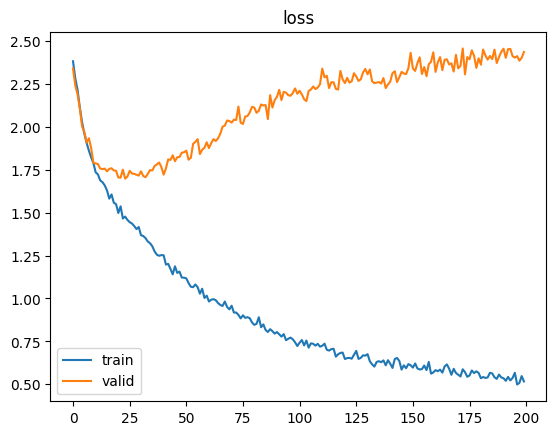

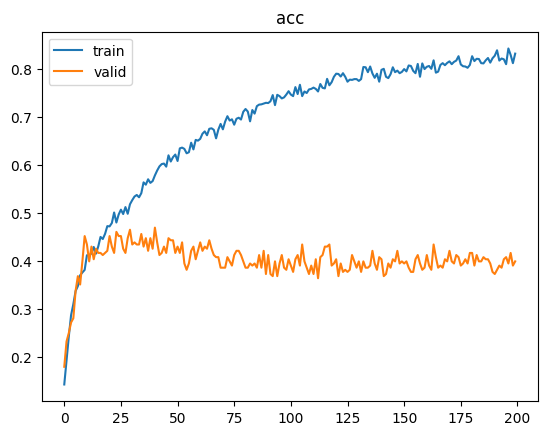

In [32]:
import matplotlib.pyplot as plt

plt.title("loss")
plt.plot(resnet18[0], label='train')
plt.plot(resnet18[1], label='valid')
plt.legend()
plt.show()

plt.title("acc")
plt.plot(resnet18[2], label='train')
plt.plot(resnet18[3], label='valid')
plt.legend()
plt.show()

In [33]:
print(resnet18)

[[2.3818506871434413, 2.2822834174774775, 2.2159076905467643, 2.112779311336932, 2.027196791827136, 1.9599957272019306, 1.90679245245412, 1.861170300009676, 1.8218602388378893, 1.7889696875548198, 1.7349877781451675, 1.7223663794911348, 1.687860782349499, 1.6776548659156592, 1.6586948716199903, 1.6294581441235658, 1.5816070118497, 1.6059825816254087, 1.5578269849311366, 1.5494998081776312, 1.4979811433680759, 1.536772262494578, 1.4658052890646822, 1.4772899554384924, 1.4577948778277103, 1.4448545104242865, 1.4367667637090984, 1.4220404656225816, 1.404397741893938, 1.4161757698145918, 1.3686843459211573, 1.363774654695422, 1.351608284859333, 1.331728744775009, 1.3219237168587397, 1.3040442482060013, 1.2741098548871792, 1.2550922439388241, 1.2487141134653361, 1.2527151369576028, 1.2515739361487677, 1.197707318148641, 1.2016954885234026, 1.1722953917830783, 1.1407496536486788, 1.1874576379860795, 1.1488675894300504, 1.15668514678998, 1.1221425010357302, 1.1210138028358865, 1.1173543449257

In [34]:
num_class = len(os.listdir(train_root))
print(f"Number of Class : {num_class}")
resnet34_model = timm.create_model('resnet34',pretrained=True,num_classes=num_class).to(DEVICE)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(resnet34_model.parameters(), lr=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9)

Number of Class : 11


In [35]:
num_epochs = NUM_EPOCHS
resnet34 = train_model(resnet34_model, criterion, optimizer,scheduler, dataloaders, dataset_sizes, DEVICE, model_dir, 'cloud_resnet34', num_epochs =num_epochs) 

cuda:0
Epoch 1/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.27it/s]


train Loss: 2.4014 Acc: 0.1098


100%|██████████| 15/15 [00:03<00:00,  5.00it/s]


valid Loss: 2.4196 Acc: 0.0833

Epoch 2/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.23it/s]


train Loss: 2.3348 Acc: 0.1634


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 2.3991 Acc: 0.0965

Epoch 3/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.10it/s]


train Loss: 2.2802 Acc: 0.1885


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.2888 Acc: 0.1842

Epoch 4/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.31it/s]


train Loss: 2.2010 Acc: 0.2410


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.2776 Acc: 0.1930

Epoch 5/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.32it/s]


train Loss: 2.1498 Acc: 0.2737


100%|██████████| 15/15 [00:03<00:00,  4.88it/s]


valid Loss: 2.2131 Acc: 0.2018

Epoch 6/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.28it/s]


train Loss: 2.0621 Acc: 0.2962


100%|██████████| 15/15 [00:03<00:00,  4.80it/s]


valid Loss: 2.1705 Acc: 0.2325

Epoch 7/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.25it/s]


train Loss: 2.0093 Acc: 0.3123


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 2.0779 Acc: 0.2544

Epoch 8/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.26it/s]


train Loss: 1.9465 Acc: 0.3310


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.0964 Acc: 0.2456

Epoch 9/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.27it/s]


train Loss: 1.8798 Acc: 0.3482


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 2.0413 Acc: 0.2982

Epoch 10/200
----------


100%|██████████| 117/117 [00:11<00:00,  9.97it/s]


train Loss: 1.8523 Acc: 0.3631


100%|██████████| 15/15 [00:03<00:00,  4.66it/s]


valid Loss: 1.9913 Acc: 0.2982

Epoch 11/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.09it/s]


train Loss: 1.8057 Acc: 0.3755


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 1.9806 Acc: 0.3202

Epoch 12/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.35it/s]


train Loss: 1.7704 Acc: 0.3953


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 1.9593 Acc: 0.3289

Epoch 13/200
----------


100%|██████████| 117/117 [00:11<00:00,  9.98it/s]


train Loss: 1.7267 Acc: 0.3926


100%|██████████| 15/15 [00:03<00:00,  4.42it/s]


valid Loss: 1.9394 Acc: 0.3158

Epoch 14/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.11it/s]


train Loss: 1.7207 Acc: 0.4044


100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


valid Loss: 1.8718 Acc: 0.3553

Epoch 15/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.22it/s]


train Loss: 1.6736 Acc: 0.4317


100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


valid Loss: 1.9034 Acc: 0.3596

Epoch 16/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.09it/s]


train Loss: 1.6552 Acc: 0.4317


100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


valid Loss: 1.8766 Acc: 0.3596

Epoch 17/200
----------


100%|██████████| 117/117 [00:11<00:00,  9.86it/s]


train Loss: 1.6047 Acc: 0.4596


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 1.9285 Acc: 0.3026

Epoch 18/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.11it/s]


train Loss: 1.6124 Acc: 0.4483


100%|██████████| 15/15 [00:03<00:00,  4.87it/s]


valid Loss: 1.8631 Acc: 0.3728

Epoch 19/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.13it/s]


train Loss: 1.5743 Acc: 0.4505


100%|██████████| 15/15 [00:03<00:00,  4.89it/s]


valid Loss: 1.8655 Acc: 0.3684

Epoch 20/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.12it/s]


train Loss: 1.5687 Acc: 0.4617


100%|██████████| 15/15 [00:03<00:00,  3.81it/s]


valid Loss: 1.8841 Acc: 0.3728

Epoch 21/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.75it/s]


train Loss: 1.5447 Acc: 0.4708


100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


valid Loss: 1.8631 Acc: 0.3596

Epoch 22/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.17it/s]


train Loss: 1.4885 Acc: 0.4858


100%|██████████| 15/15 [00:03<00:00,  5.00it/s]


valid Loss: 1.8487 Acc: 0.3860

Epoch 23/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.28it/s]


train Loss: 1.4892 Acc: 0.4971


100%|██████████| 15/15 [00:03<00:00,  4.81it/s]


valid Loss: 1.8700 Acc: 0.3684

Epoch 24/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.27it/s]


train Loss: 1.5157 Acc: 0.4778


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 1.8542 Acc: 0.3772

Epoch 25/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.25it/s]


train Loss: 1.4640 Acc: 0.4938


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 1.8424 Acc: 0.3904

Epoch 26/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.19it/s]


train Loss: 1.4510 Acc: 0.5046


100%|██████████| 15/15 [00:03<00:00,  4.54it/s]


valid Loss: 1.8081 Acc: 0.4167

Epoch 27/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.64it/s]


train Loss: 1.4195 Acc: 0.5088


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 1.8439 Acc: 0.3904

Epoch 28/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.29it/s]


train Loss: 1.3952 Acc: 0.5153


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 1.7881 Acc: 0.4167

Epoch 29/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.24it/s]


train Loss: 1.4230 Acc: 0.5131


100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


valid Loss: 1.8275 Acc: 0.4035

Epoch 30/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.13it/s]


train Loss: 1.3944 Acc: 0.5051


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 1.8803 Acc: 0.3553

Epoch 31/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.27it/s]


train Loss: 1.3784 Acc: 0.5099


100%|██████████| 15/15 [00:03<00:00,  5.00it/s]


valid Loss: 1.8412 Acc: 0.4123

Epoch 32/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.26it/s]


train Loss: 1.3427 Acc: 0.5297


100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


valid Loss: 1.8365 Acc: 0.4167

Epoch 33/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.29it/s]


train Loss: 1.3090 Acc: 0.5517


100%|██████████| 15/15 [00:03<00:00,  4.85it/s]


valid Loss: 1.8678 Acc: 0.3947

Epoch 34/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.23it/s]


train Loss: 1.3021 Acc: 0.5431


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 1.8846 Acc: 0.4079

Epoch 35/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.31it/s]


train Loss: 1.2799 Acc: 0.5587


100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


valid Loss: 1.9089 Acc: 0.3728

Epoch 36/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.34it/s]


train Loss: 1.2837 Acc: 0.5613


100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


valid Loss: 1.8759 Acc: 0.3772

Epoch 37/200
----------


100%|██████████| 117/117 [00:11<00:00,  9.91it/s]


train Loss: 1.2317 Acc: 0.5854


100%|██████████| 15/15 [00:02<00:00,  5.10it/s]


valid Loss: 1.9358 Acc: 0.3596

Epoch 38/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.26it/s]


train Loss: 1.2393 Acc: 0.5629


100%|██████████| 15/15 [00:03<00:00,  4.90it/s]


valid Loss: 1.8871 Acc: 0.3596

Epoch 39/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.23it/s]


train Loss: 1.2340 Acc: 0.5758


100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


valid Loss: 1.9332 Acc: 0.3684

Epoch 40/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.35it/s]


train Loss: 1.2088 Acc: 0.5672


100%|██████████| 15/15 [00:03<00:00,  4.79it/s]


valid Loss: 1.8992 Acc: 0.4079

Epoch 41/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.26it/s]


train Loss: 1.2000 Acc: 0.5881


100%|██████████| 15/15 [00:03<00:00,  4.77it/s]


valid Loss: 1.9038 Acc: 0.3904

Epoch 42/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.25it/s]


train Loss: 1.2013 Acc: 0.5795


100%|██████████| 15/15 [00:02<00:00,  5.12it/s]


valid Loss: 1.8982 Acc: 0.3991

Epoch 43/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.28it/s]


train Loss: 1.1483 Acc: 0.6004


100%|██████████| 15/15 [00:03<00:00,  4.91it/s]


valid Loss: 1.9187 Acc: 0.3421

Epoch 44/200
----------


100%|██████████| 117/117 [00:11<00:00,  9.98it/s]


train Loss: 1.1660 Acc: 0.5940


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 1.9141 Acc: 0.3772

Epoch 45/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.31it/s]


train Loss: 1.1249 Acc: 0.6170


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 1.9105 Acc: 0.3860

Epoch 46/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.33it/s]


train Loss: 1.1422 Acc: 0.6095


100%|██████████| 15/15 [00:02<00:00,  5.00it/s]


valid Loss: 1.8984 Acc: 0.3684

Epoch 47/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.21it/s]


train Loss: 1.0832 Acc: 0.6336


100%|██████████| 15/15 [00:03<00:00,  4.84it/s]


valid Loss: 1.8665 Acc: 0.3991

Epoch 48/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.22it/s]


train Loss: 1.1413 Acc: 0.6144


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 1.9029 Acc: 0.3904

Epoch 49/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.13it/s]


train Loss: 1.1108 Acc: 0.6101


100%|██████████| 15/15 [00:03<00:00,  4.83it/s]


valid Loss: 1.9381 Acc: 0.3947

Epoch 50/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.25it/s]


train Loss: 1.0771 Acc: 0.6395


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 1.9092 Acc: 0.4079

Epoch 51/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.01it/s]


train Loss: 1.0759 Acc: 0.6267


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 1.8850 Acc: 0.4079

Epoch 52/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.08it/s]


train Loss: 1.0516 Acc: 0.6352


100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


valid Loss: 1.9306 Acc: 0.4079

Epoch 53/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.21it/s]


train Loss: 1.0972 Acc: 0.6224


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 1.8972 Acc: 0.4035

Epoch 54/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.25it/s]


train Loss: 1.0288 Acc: 0.6551


100%|██████████| 15/15 [00:03<00:00,  4.84it/s]


valid Loss: 1.9468 Acc: 0.4035

Epoch 55/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.12it/s]


train Loss: 1.0405 Acc: 0.6486


100%|██████████| 15/15 [00:03<00:00,  4.90it/s]


valid Loss: 1.9691 Acc: 0.3991

Epoch 56/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.24it/s]


train Loss: 1.0202 Acc: 0.6438


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 1.9882 Acc: 0.3904

Epoch 57/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.30it/s]


train Loss: 0.9987 Acc: 0.6604


100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


valid Loss: 1.9485 Acc: 0.4474

Epoch 58/200
----------


100%|██████████| 117/117 [00:11<00:00,  9.97it/s]


train Loss: 0.9989 Acc: 0.6610


100%|██████████| 15/15 [00:03<00:00,  4.86it/s]


valid Loss: 1.9556 Acc: 0.4342

Epoch 59/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.26it/s]


train Loss: 0.9705 Acc: 0.6738


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 1.9969 Acc: 0.3860

Epoch 60/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.13it/s]


train Loss: 0.9887 Acc: 0.6695


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 1.9904 Acc: 0.4167

Epoch 61/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.29it/s]


train Loss: 0.9376 Acc: 0.6797


100%|██████████| 15/15 [00:03<00:00,  4.71it/s]


valid Loss: 2.0490 Acc: 0.4035

Epoch 62/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.24it/s]


train Loss: 0.9452 Acc: 0.6776


100%|██████████| 15/15 [00:03<00:00,  5.00it/s]


valid Loss: 2.0303 Acc: 0.3860

Epoch 63/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.14it/s]


train Loss: 0.9756 Acc: 0.6706


100%|██████████| 15/15 [00:03<00:00,  4.79it/s]


valid Loss: 1.9765 Acc: 0.4035

Epoch 64/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.27it/s]


train Loss: 0.9374 Acc: 0.6851


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 2.0031 Acc: 0.3904

Epoch 65/200
----------


100%|██████████| 117/117 [00:11<00:00,  9.89it/s]


train Loss: 0.9119 Acc: 0.6947


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 2.0174 Acc: 0.4079

Epoch 66/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.34it/s]


train Loss: 0.9248 Acc: 0.6813


100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


valid Loss: 2.0604 Acc: 0.4123

Epoch 67/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.37it/s]


train Loss: 0.9153 Acc: 0.6968


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.0138 Acc: 0.3947

Epoch 68/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.29it/s]


train Loss: 0.8650 Acc: 0.7102


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 2.0481 Acc: 0.3860

Epoch 69/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.18it/s]


train Loss: 0.8770 Acc: 0.7070


100%|██████████| 15/15 [00:03<00:00,  4.91it/s]


valid Loss: 2.0423 Acc: 0.3640

Epoch 70/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.24it/s]


train Loss: 0.8690 Acc: 0.7097


100%|██████████| 15/15 [00:03<00:00,  4.26it/s]


valid Loss: 2.0641 Acc: 0.3816

Epoch 71/200
----------


100%|██████████| 117/117 [00:11<00:00,  9.96it/s]


train Loss: 0.8844 Acc: 0.7038


100%|██████████| 15/15 [00:03<00:00,  5.00it/s]


valid Loss: 2.0541 Acc: 0.4035

Epoch 72/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.31it/s]


train Loss: 0.8260 Acc: 0.7199


100%|██████████| 15/15 [00:03<00:00,  4.82it/s]


valid Loss: 2.0685 Acc: 0.4123

Epoch 73/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.23it/s]


train Loss: 0.8352 Acc: 0.7097


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 2.1056 Acc: 0.4079

Epoch 74/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.32it/s]


train Loss: 0.8464 Acc: 0.7204


100%|██████████| 15/15 [00:02<00:00,  5.09it/s]


valid Loss: 2.1114 Acc: 0.3991

Epoch 75/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.25it/s]


train Loss: 0.8196 Acc: 0.7263


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 2.0394 Acc: 0.4035

Epoch 76/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.02it/s]


train Loss: 0.8099 Acc: 0.7295


100%|██████████| 15/15 [00:03<00:00,  4.91it/s]


valid Loss: 2.0423 Acc: 0.4167

Epoch 77/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.26it/s]


train Loss: 0.8203 Acc: 0.7151


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.0690 Acc: 0.4035

Epoch 78/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.19it/s]


train Loss: 0.8126 Acc: 0.7242


100%|██████████| 15/15 [00:02<00:00,  5.13it/s]


valid Loss: 2.0771 Acc: 0.4167

Epoch 79/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.25it/s]


train Loss: 0.8136 Acc: 0.7140


100%|██████████| 15/15 [00:03<00:00,  4.92it/s]


valid Loss: 2.0361 Acc: 0.3860

Epoch 80/200
----------


100%|██████████| 117/117 [00:11<00:00,  9.93it/s]


train Loss: 0.7712 Acc: 0.7392


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 2.0704 Acc: 0.4123

Epoch 81/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.29it/s]


train Loss: 0.7917 Acc: 0.7252


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.1258 Acc: 0.3816

Epoch 82/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.29it/s]


train Loss: 0.7548 Acc: 0.7370


100%|██████████| 15/15 [00:03<00:00,  4.86it/s]


valid Loss: 2.0566 Acc: 0.4079

Epoch 83/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.32it/s]


train Loss: 0.7512 Acc: 0.7461


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 2.1492 Acc: 0.3947

Epoch 84/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.30it/s]


train Loss: 0.7571 Acc: 0.7408


100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


valid Loss: 2.1834 Acc: 0.3904

Epoch 85/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.11it/s]


train Loss: 0.7160 Acc: 0.7616


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.1656 Acc: 0.3947

Epoch 86/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.14it/s]


train Loss: 0.7365 Acc: 0.7584


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 2.1350 Acc: 0.4035

Epoch 87/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.02it/s]


train Loss: 0.7242 Acc: 0.7552


100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


valid Loss: 2.1119 Acc: 0.4123

Epoch 88/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.24it/s]


train Loss: 0.7479 Acc: 0.7456


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.1778 Acc: 0.3860

Epoch 89/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.19it/s]


train Loss: 0.7221 Acc: 0.7595


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.1107 Acc: 0.4079

Epoch 90/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.11it/s]


train Loss: 0.7474 Acc: 0.7504


100%|██████████| 15/15 [00:03<00:00,  4.69it/s]


valid Loss: 2.1225 Acc: 0.4254

Epoch 91/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.19it/s]


train Loss: 0.7061 Acc: 0.7691


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.0899 Acc: 0.4254

Epoch 92/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.22it/s]


train Loss: 0.7304 Acc: 0.7509


100%|██████████| 15/15 [00:02<00:00,  5.00it/s]


valid Loss: 2.1420 Acc: 0.3904

Epoch 93/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.22it/s]


train Loss: 0.7256 Acc: 0.7654


100%|██████████| 15/15 [00:03<00:00,  4.87it/s]


valid Loss: 2.1809 Acc: 0.4123

Epoch 94/200
----------


100%|██████████| 117/117 [00:11<00:00,  9.87it/s]


train Loss: 0.6979 Acc: 0.7558


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 2.0912 Acc: 0.4342

Epoch 95/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.17it/s]


train Loss: 0.7290 Acc: 0.7574


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 2.1199 Acc: 0.3904

Epoch 96/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.26it/s]


train Loss: 0.6832 Acc: 0.7809


100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


valid Loss: 2.1120 Acc: 0.4167

Epoch 97/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.25it/s]


train Loss: 0.6798 Acc: 0.7772


100%|██████████| 15/15 [00:03<00:00,  4.86it/s]


valid Loss: 2.1254 Acc: 0.4035

Epoch 98/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.23it/s]


train Loss: 0.6962 Acc: 0.7713


100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


valid Loss: 2.1019 Acc: 0.4298

Epoch 99/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.27it/s]


train Loss: 0.6824 Acc: 0.7718


100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


valid Loss: 2.1726 Acc: 0.4254

Epoch 100/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.29it/s]


train Loss: 0.6914 Acc: 0.7675


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 2.1441 Acc: 0.4035

Epoch 101/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.05it/s]


train Loss: 0.6741 Acc: 0.7772


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 2.1806 Acc: 0.4386

Epoch 102/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.16it/s]


train Loss: 0.6387 Acc: 0.7831


100%|██████████| 15/15 [00:03<00:00,  4.81it/s]


valid Loss: 2.1681 Acc: 0.4211

Epoch 103/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.28it/s]


train Loss: 0.6214 Acc: 0.7884


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 2.1686 Acc: 0.4298

Epoch 104/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.23it/s]


train Loss: 0.6254 Acc: 0.7900


100%|██████████| 15/15 [00:03<00:00,  4.87it/s]


valid Loss: 2.1275 Acc: 0.4386

Epoch 105/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.13it/s]


train Loss: 0.6489 Acc: 0.7815


100%|██████████| 15/15 [00:03<00:00,  4.92it/s]


valid Loss: 2.0757 Acc: 0.4430

Epoch 106/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.22it/s]


train Loss: 0.6222 Acc: 0.7922


100%|██████████| 15/15 [00:02<00:00,  5.00it/s]


valid Loss: 2.1267 Acc: 0.4254

Epoch 107/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.07it/s]


train Loss: 0.6521 Acc: 0.7847


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.1819 Acc: 0.4211

Epoch 108/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.04it/s]


train Loss: 0.6628 Acc: 0.7820


100%|██████████| 15/15 [00:03<00:00,  4.83it/s]


valid Loss: 2.1916 Acc: 0.4167

Epoch 109/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.18it/s]


train Loss: 0.6084 Acc: 0.7911


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.3052 Acc: 0.4342

Epoch 110/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.27it/s]


train Loss: 0.6292 Acc: 0.7799


100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


valid Loss: 2.2377 Acc: 0.4211

Epoch 111/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.14it/s]


train Loss: 0.6066 Acc: 0.8056


100%|██████████| 15/15 [00:03<00:00,  4.60it/s]


valid Loss: 2.2410 Acc: 0.4123

Epoch 112/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.25it/s]


train Loss: 0.5935 Acc: 0.7981


100%|██████████| 15/15 [00:02<00:00,  5.00it/s]


valid Loss: 2.2045 Acc: 0.4386

Epoch 113/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.24it/s]


train Loss: 0.6034 Acc: 0.8050


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 2.2732 Acc: 0.4211

Epoch 114/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.28it/s]


train Loss: 0.5964 Acc: 0.7879


100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


valid Loss: 2.2638 Acc: 0.4035

Epoch 115/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.01it/s]


train Loss: 0.6149 Acc: 0.7949


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.2190 Acc: 0.4298

Epoch 116/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.26it/s]


train Loss: 0.6130 Acc: 0.7986


100%|██████████| 15/15 [00:02<00:00,  5.00it/s]


valid Loss: 2.2309 Acc: 0.4430

Epoch 117/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.33it/s]


train Loss: 0.5895 Acc: 0.7949


100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


valid Loss: 2.2840 Acc: 0.4211

Epoch 118/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.28it/s]


train Loss: 0.6015 Acc: 0.8045


100%|██████████| 15/15 [00:03<00:00,  4.79it/s]


valid Loss: 2.2437 Acc: 0.4474

Epoch 119/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.28it/s]


train Loss: 0.6066 Acc: 0.7981


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 2.2265 Acc: 0.4430

Epoch 120/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.30it/s]


train Loss: 0.5918 Acc: 0.7949


100%|██████████| 15/15 [00:03<00:00,  4.87it/s]


valid Loss: 2.2185 Acc: 0.4211

Epoch 121/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.26it/s]


train Loss: 0.5654 Acc: 0.8066


100%|██████████| 15/15 [00:02<00:00,  5.14it/s]


valid Loss: 2.3024 Acc: 0.4079

Epoch 122/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.00it/s]


train Loss: 0.5721 Acc: 0.8136


100%|██████████| 15/15 [00:02<00:00,  5.00it/s]


valid Loss: 2.2979 Acc: 0.4123

Epoch 123/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.29it/s]


train Loss: 0.5736 Acc: 0.8034


100%|██████████| 15/15 [00:03<00:00,  4.85it/s]


valid Loss: 2.3327 Acc: 0.3991

Epoch 124/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.33it/s]


train Loss: 0.5361 Acc: 0.8195


100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


valid Loss: 2.2977 Acc: 0.4167

Epoch 125/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.34it/s]


train Loss: 0.5281 Acc: 0.8104


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.3448 Acc: 0.4123

Epoch 126/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.16it/s]


train Loss: 0.5599 Acc: 0.8131


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.3144 Acc: 0.4254

Epoch 127/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.25it/s]


train Loss: 0.5630 Acc: 0.8034


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.2707 Acc: 0.3947

Epoch 128/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.32it/s]


train Loss: 0.5493 Acc: 0.8072


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 2.3394 Acc: 0.4298

Epoch 129/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.04it/s]


train Loss: 0.5726 Acc: 0.8082


100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


valid Loss: 2.3371 Acc: 0.4167

Epoch 130/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.22it/s]


train Loss: 0.5430 Acc: 0.8136


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 2.2982 Acc: 0.4254

Epoch 131/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.26it/s]


train Loss: 0.5463 Acc: 0.8131


100%|██████████| 15/15 [00:03<00:00,  5.00it/s]


valid Loss: 2.3527 Acc: 0.4211

Epoch 132/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.29it/s]


train Loss: 0.5504 Acc: 0.8179


100%|██████████| 15/15 [00:03<00:00,  4.90it/s]


valid Loss: 2.3101 Acc: 0.4298

Epoch 133/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.24it/s]


train Loss: 0.5475 Acc: 0.8125


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.3293 Acc: 0.4123

Epoch 134/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.23it/s]


train Loss: 0.5528 Acc: 0.8136


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.3514 Acc: 0.4386

Epoch 135/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.22it/s]


train Loss: 0.5422 Acc: 0.8152


100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


valid Loss: 2.3431 Acc: 0.4254

Epoch 136/200
----------


100%|██████████| 117/117 [00:11<00:00,  9.97it/s]


train Loss: 0.5327 Acc: 0.8147


100%|██████████| 15/15 [00:02<00:00,  5.09it/s]


valid Loss: 2.4173 Acc: 0.4079

Epoch 137/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.22it/s]


train Loss: 0.5308 Acc: 0.8222


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 2.3871 Acc: 0.3991

Epoch 138/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.16it/s]


train Loss: 0.5190 Acc: 0.8179


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.3794 Acc: 0.4254

Epoch 139/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.33it/s]


train Loss: 0.5514 Acc: 0.8066


100%|██████████| 15/15 [00:03<00:00,  4.87it/s]


valid Loss: 2.3954 Acc: 0.4123

Epoch 140/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.27it/s]


train Loss: 0.5036 Acc: 0.8345


100%|██████████| 15/15 [00:02<00:00,  5.09it/s]


valid Loss: 2.3243 Acc: 0.4474

Epoch 141/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.26it/s]


train Loss: 0.5501 Acc: 0.8109


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 2.2949 Acc: 0.4386

Epoch 142/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.30it/s]


train Loss: 0.5189 Acc: 0.8222


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.3772 Acc: 0.4211

Epoch 143/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.01it/s]


train Loss: 0.5131 Acc: 0.8313


100%|██████████| 15/15 [00:02<00:00,  5.10it/s]


valid Loss: 2.2890 Acc: 0.4211

Epoch 144/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.22it/s]


train Loss: 0.5103 Acc: 0.8286


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.3512 Acc: 0.4474

Epoch 145/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.35it/s]


train Loss: 0.5405 Acc: 0.8152


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 2.3760 Acc: 0.4386

Epoch 146/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.27it/s]


train Loss: 0.5022 Acc: 0.8222


100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


valid Loss: 2.4270 Acc: 0.4167

Epoch 147/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.20it/s]


train Loss: 0.5084 Acc: 0.8345


100%|██████████| 15/15 [00:03<00:00,  4.41it/s]


valid Loss: 2.4244 Acc: 0.4254

Epoch 148/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.63it/s]


train Loss: 0.5068 Acc: 0.8275


100%|██████████| 15/15 [00:03<00:00,  4.31it/s]


valid Loss: 2.3373 Acc: 0.4342

Epoch 149/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.61it/s]


train Loss: 0.5055 Acc: 0.8318


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 2.3696 Acc: 0.4123

Epoch 150/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.19it/s]


train Loss: 0.5219 Acc: 0.8211


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 2.4313 Acc: 0.4079

Epoch 151/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.27it/s]


train Loss: 0.5114 Acc: 0.8249


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.4446 Acc: 0.3772

Epoch 152/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.34it/s]


train Loss: 0.4963 Acc: 0.8243


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.4387 Acc: 0.4211

Epoch 153/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.13it/s]


train Loss: 0.4978 Acc: 0.8318


100%|██████████| 15/15 [00:03<00:00,  4.85it/s]


valid Loss: 2.3905 Acc: 0.4167

Epoch 154/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.22it/s]


train Loss: 0.4966 Acc: 0.8345


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.3851 Acc: 0.4342

Epoch 155/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.27it/s]


train Loss: 0.4807 Acc: 0.8356


100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


valid Loss: 2.4658 Acc: 0.4167

Epoch 156/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.30it/s]


train Loss: 0.5105 Acc: 0.8297


100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


valid Loss: 2.4341 Acc: 0.4254

Epoch 157/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.22it/s]


train Loss: 0.5061 Acc: 0.8259


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.4401 Acc: 0.4298

Epoch 158/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.25it/s]


train Loss: 0.4719 Acc: 0.8377


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.3829 Acc: 0.4079

Epoch 159/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.29it/s]


train Loss: 0.4804 Acc: 0.8404


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.4098 Acc: 0.4342

Epoch 160/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.05it/s]


train Loss: 0.5248 Acc: 0.8200


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 2.4166 Acc: 0.3991

Epoch 161/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.21it/s]


train Loss: 0.5318 Acc: 0.8211


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 2.4231 Acc: 0.3816

Epoch 162/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.26it/s]


train Loss: 0.4945 Acc: 0.8286


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.3971 Acc: 0.3991

Epoch 163/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.35it/s]


train Loss: 0.4662 Acc: 0.8372


100%|██████████| 15/15 [00:03<00:00,  4.69it/s]


valid Loss: 2.4221 Acc: 0.3509

Epoch 164/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.21it/s]


train Loss: 0.4750 Acc: 0.8366


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.4298 Acc: 0.3991

Epoch 165/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.25it/s]


train Loss: 0.5162 Acc: 0.8232


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 2.4234 Acc: 0.4123

Epoch 166/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.25it/s]


train Loss: 0.4746 Acc: 0.8431


100%|██████████| 15/15 [00:02<00:00,  5.11it/s]


valid Loss: 2.4502 Acc: 0.4123

Epoch 167/200
----------


100%|██████████| 117/117 [00:11<00:00,  9.94it/s]


train Loss: 0.4964 Acc: 0.8366


100%|██████████| 15/15 [00:02<00:00,  5.12it/s]


valid Loss: 2.4676 Acc: 0.3947

Epoch 168/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.32it/s]


train Loss: 0.4713 Acc: 0.8484


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 2.4650 Acc: 0.3860

Epoch 169/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.25it/s]


train Loss: 0.4788 Acc: 0.8377


100%|██████████| 15/15 [00:02<00:00,  5.11it/s]


valid Loss: 2.4424 Acc: 0.3684

Epoch 170/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.32it/s]


train Loss: 0.4816 Acc: 0.8350


100%|██████████| 15/15 [00:03<00:00,  4.69it/s]


valid Loss: 2.4257 Acc: 0.3816

Epoch 171/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.31it/s]


train Loss: 0.4707 Acc: 0.8350


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 2.3945 Acc: 0.4123

Epoch 172/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.26it/s]


train Loss: 0.4465 Acc: 0.8457


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.4544 Acc: 0.3991

Epoch 173/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.22it/s]


train Loss: 0.4686 Acc: 0.8377


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.4423 Acc: 0.4211

Epoch 174/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.75it/s]


train Loss: 0.4626 Acc: 0.8468


100%|██████████| 15/15 [00:03<00:00,  4.90it/s]


valid Loss: 2.4996 Acc: 0.4167

Epoch 175/200
----------


100%|██████████| 117/117 [00:11<00:00,  9.86it/s]


train Loss: 0.4435 Acc: 0.8495


100%|██████████| 15/15 [00:03<00:00,  4.73it/s]


valid Loss: 2.4625 Acc: 0.3860

Epoch 176/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.73it/s]


train Loss: 0.4565 Acc: 0.8425


100%|██████████| 15/15 [00:04<00:00,  3.45it/s]


valid Loss: 2.4319 Acc: 0.3947

Epoch 177/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.50it/s]


train Loss: 0.4649 Acc: 0.8436


100%|██████████| 15/15 [00:04<00:00,  3.59it/s]


valid Loss: 2.4661 Acc: 0.3947

Epoch 178/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.08it/s]


train Loss: 0.4773 Acc: 0.8361


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.5257 Acc: 0.4254

Epoch 179/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.37it/s]


train Loss: 0.4824 Acc: 0.8307


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.4899 Acc: 0.3860

Epoch 180/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.23it/s]


train Loss: 0.4747 Acc: 0.8345


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 2.4579 Acc: 0.4254

Epoch 181/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.42it/s]


train Loss: 0.4822 Acc: 0.8356


100%|██████████| 15/15 [00:02<00:00,  5.14it/s]


valid Loss: 2.4399 Acc: 0.4211

Epoch 182/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.40it/s]


train Loss: 0.4485 Acc: 0.8468


100%|██████████| 15/15 [00:02<00:00,  5.17it/s]


valid Loss: 2.4338 Acc: 0.4123

Epoch 183/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.38it/s]


train Loss: 0.4475 Acc: 0.8452


100%|██████████| 15/15 [00:02<00:00,  5.09it/s]


valid Loss: 2.5018 Acc: 0.3860

Epoch 184/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.39it/s]


train Loss: 0.4413 Acc: 0.8447


100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


valid Loss: 2.4798 Acc: 0.3991

Epoch 185/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.41it/s]


train Loss: 0.4424 Acc: 0.8602


100%|██████████| 15/15 [00:02<00:00,  5.20it/s]


valid Loss: 2.4327 Acc: 0.4298

Epoch 186/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.45it/s]


train Loss: 0.4674 Acc: 0.8372


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.5104 Acc: 0.3816

Epoch 187/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.34it/s]


train Loss: 0.4758 Acc: 0.8356


100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


valid Loss: 2.4373 Acc: 0.4123

Epoch 188/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.43it/s]


train Loss: 0.4339 Acc: 0.8527


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 2.5140 Acc: 0.4211

Epoch 189/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.41it/s]


train Loss: 0.4722 Acc: 0.8404


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.4709 Acc: 0.4167

Epoch 190/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.23it/s]


train Loss: 0.4442 Acc: 0.8484


100%|██████████| 15/15 [00:02<00:00,  5.15it/s]


valid Loss: 2.4506 Acc: 0.4167

Epoch 191/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.39it/s]


train Loss: 0.4498 Acc: 0.8473


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.5018 Acc: 0.4211

Epoch 192/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.39it/s]


train Loss: 0.4309 Acc: 0.8570


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.4914 Acc: 0.4298

Epoch 193/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.38it/s]


train Loss: 0.4202 Acc: 0.8538


100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


valid Loss: 2.4651 Acc: 0.4211

Epoch 194/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.44it/s]


train Loss: 0.4446 Acc: 0.8484


100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


valid Loss: 2.4987 Acc: 0.4035

Epoch 195/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.39it/s]


train Loss: 0.4427 Acc: 0.8490


100%|██████████| 15/15 [00:02<00:00,  5.10it/s]


valid Loss: 2.5113 Acc: 0.4167

Epoch 196/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.53it/s]


train Loss: 0.4305 Acc: 0.8522


100%|██████████| 15/15 [00:03<00:00,  4.90it/s]


valid Loss: 2.4389 Acc: 0.4254

Epoch 197/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.41it/s]


train Loss: 0.4492 Acc: 0.8441


100%|██████████| 15/15 [00:02<00:00,  5.11it/s]


valid Loss: 2.4570 Acc: 0.3904

Epoch 198/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.30it/s]


train Loss: 0.4240 Acc: 0.8581


100%|██████████| 15/15 [00:02<00:00,  5.10it/s]


valid Loss: 2.4657 Acc: 0.4123

Epoch 199/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.39it/s]


train Loss: 0.4474 Acc: 0.8495


100%|██████████| 15/15 [00:02<00:00,  5.11it/s]


valid Loss: 2.5109 Acc: 0.4035

Epoch 200/200
----------


100%|██████████| 117/117 [00:11<00:00, 10.19it/s]


train Loss: 0.4003 Acc: 0.8666


100%|██████████| 15/15 [00:03<00:00,  4.92it/s]

valid Loss: 2.4899 Acc: 0.4167

Training complete in 48m 27s
Best val Acc: 0.4474


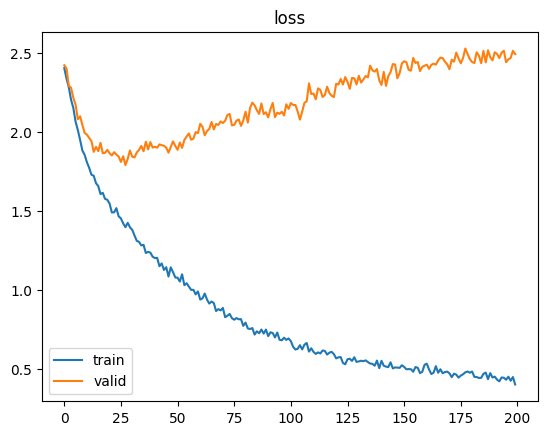

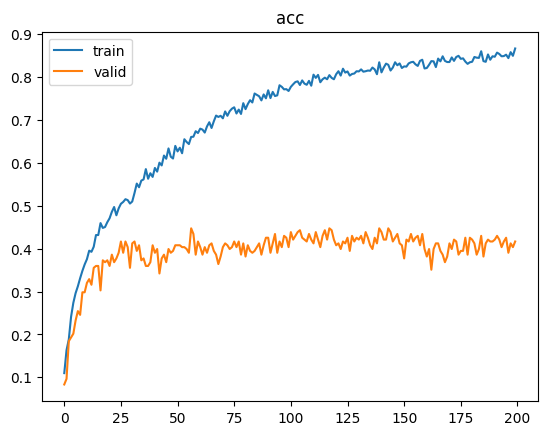

In [36]:
import matplotlib.pyplot as plt

plt.title("loss")
plt.plot(resnet34[0], label='train')
plt.plot(resnet34[1], label='valid')
plt.legend()
plt.show()

plt.title("acc")
plt.plot(resnet34[2], label='train')
plt.plot(resnet34[3], label='valid')
plt.legend()
plt.show()

In [37]:
print(resnet34)

[[2.4013928708126024, 2.334762601847309, 2.280223838518058, 2.2010326565557072, 2.1498104116785126, 2.062142381772806, 2.0093481250797676, 1.9464660368951554, 1.8798392333637026, 1.852260893209771, 1.805662553835247, 1.7703988365010903, 1.726691510183133, 1.7207168986213737, 1.6735564848287385, 1.6551869620469783, 1.604705367103642, 1.6124495418555735, 1.5742738074520788, 1.5687078751531844, 1.5446694021117706, 1.4884562256761458, 1.4891949993566709, 1.515703681195938, 1.46396096102618, 1.450959658648282, 1.4194966764072077, 1.3952401281360898, 1.4230406496955164, 1.3943976955613033, 1.3783580640068525, 1.342681536715364, 1.3089829094600218, 1.3021054074415628, 1.27988069269449, 1.283651073922687, 1.2317423769415032, 1.2393493370123578, 1.2340346102288016, 1.2087808662898794, 1.200011490817752, 1.2012612841380874, 1.1483312253014697, 1.16602865252574, 1.1249240127296836, 1.14217837165241, 1.0831703079787562, 1.1413223229440446, 1.110812974665723, 1.0771206821039137, 1.0759098552163424,

In [38]:
num_class = len(os.listdir(train_root))
print(f"Number of Class : {num_class}")
resnet50_model = timm.create_model('resnet50',pretrained=True,num_classes=num_class).to(DEVICE)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(resnet50_model.parameters(), lr=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9)

Number of Class : 11


In [39]:
num_epochs = NUM_EPOCHS
resnet50 = train_model(resnet50_model, criterion, optimizer,scheduler, dataloaders, dataset_sizes, DEVICE, model_dir, 'cloud_resnet50', num_epochs =num_epochs) 

cuda:0
Epoch 1/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.06it/s]


train Loss: 2.3773 Acc: 0.1285


100%|██████████| 15/15 [00:03<00:00,  4.14it/s]


valid Loss: 2.9883 Acc: 0.1316

Epoch 2/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.64it/s]


train Loss: 2.3190 Acc: 0.1826


100%|██████████| 15/15 [00:03<00:00,  4.37it/s]


valid Loss: 2.6032 Acc: 0.1930

Epoch 3/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.73it/s]


train Loss: 2.2566 Acc: 0.2384


100%|██████████| 15/15 [00:03<00:00,  4.23it/s]


valid Loss: 2.3283 Acc: 0.2237

Epoch 4/200
----------


100%|██████████| 117/117 [00:17<00:00,  6.68it/s]


train Loss: 2.1726 Acc: 0.2796


100%|██████████| 15/15 [00:03<00:00,  4.80it/s]


valid Loss: 2.2229 Acc: 0.2632

Epoch 5/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.79it/s]


train Loss: 2.0729 Acc: 0.3149


100%|██████████| 15/15 [00:03<00:00,  4.25it/s]


valid Loss: 2.2448 Acc: 0.3026

Epoch 6/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.98it/s]


train Loss: 1.9734 Acc: 0.3348


100%|██████████| 15/15 [00:03<00:00,  4.89it/s]


valid Loss: 2.1554 Acc: 0.3026

Epoch 7/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.97it/s]


train Loss: 1.9224 Acc: 0.3460


100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


valid Loss: 2.0921 Acc: 0.3026

Epoch 8/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.08it/s]


train Loss: 1.8532 Acc: 0.3594


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 2.4851 Acc: 0.3421

Epoch 9/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.13it/s]


train Loss: 1.8213 Acc: 0.3653


100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


valid Loss: 1.9609 Acc: 0.3421

Epoch 10/200
----------


100%|██████████| 117/117 [00:15<00:00,  7.62it/s]


train Loss: 1.7553 Acc: 0.3862


100%|██████████| 15/15 [00:05<00:00,  2.96it/s]


valid Loss: 1.9292 Acc: 0.3465

Epoch 11/200
----------


100%|██████████| 117/117 [00:14<00:00,  8.07it/s]


train Loss: 1.6964 Acc: 0.4119


100%|██████████| 15/15 [00:03<00:00,  4.27it/s]


valid Loss: 1.7987 Acc: 0.3684

Epoch 12/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.69it/s]


train Loss: 1.6866 Acc: 0.4119


100%|██████████| 15/15 [00:03<00:00,  4.52it/s]


valid Loss: 1.8196 Acc: 0.3640

Epoch 13/200
----------


100%|██████████| 117/117 [00:14<00:00,  8.28it/s]


train Loss: 1.6717 Acc: 0.4301


100%|██████████| 15/15 [00:03<00:00,  4.27it/s]


valid Loss: 1.8095 Acc: 0.3377

Epoch 14/200
----------


100%|██████████| 117/117 [00:14<00:00,  8.31it/s]


train Loss: 1.6194 Acc: 0.4355


100%|██████████| 15/15 [00:03<00:00,  4.35it/s]


valid Loss: 1.8400 Acc: 0.3684

Epoch 15/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.20it/s]


train Loss: 1.6309 Acc: 0.4349


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 1.8084 Acc: 0.3465

Epoch 16/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.23it/s]


train Loss: 1.5759 Acc: 0.4676


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 1.9225 Acc: 0.3772

Epoch 17/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.24it/s]


train Loss: 1.5376 Acc: 0.4590


100%|██████████| 15/15 [00:03<00:00,  4.90it/s]


valid Loss: 1.9312 Acc: 0.3509

Epoch 18/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.20it/s]


train Loss: 1.5162 Acc: 0.4697


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 1.7480 Acc: 0.3904

Epoch 19/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.22it/s]


train Loss: 1.4988 Acc: 0.4853


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 1.8130 Acc: 0.3640

Epoch 20/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.23it/s]


train Loss: 1.4579 Acc: 0.4815


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 1.8434 Acc: 0.4079

Epoch 21/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.18it/s]


train Loss: 1.4600 Acc: 0.4976


100%|██████████| 15/15 [00:03<00:00,  4.62it/s]


valid Loss: 1.8371 Acc: 0.4254

Epoch 22/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.55it/s]


train Loss: 1.4414 Acc: 0.4992


100%|██████████| 15/15 [00:03<00:00,  4.45it/s]


valid Loss: 1.9228 Acc: 0.3904

Epoch 23/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.69it/s]


train Loss: 1.4482 Acc: 0.4944


100%|██████████| 15/15 [00:03<00:00,  4.42it/s]


valid Loss: 2.1461 Acc: 0.3860

Epoch 24/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.99it/s]


train Loss: 1.3980 Acc: 0.5153


100%|██████████| 15/15 [00:03<00:00,  4.39it/s]


valid Loss: 2.0911 Acc: 0.3596

Epoch 25/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.97it/s]


train Loss: 1.3914 Acc: 0.5196


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 1.9269 Acc: 0.3991

Epoch 26/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.75it/s]


train Loss: 1.3977 Acc: 0.5351


100%|██████████| 15/15 [00:03<00:00,  4.47it/s]


valid Loss: 1.7848 Acc: 0.4035

Epoch 27/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.98it/s]


train Loss: 1.3572 Acc: 0.5254


100%|██████████| 15/15 [00:03<00:00,  4.53it/s]


valid Loss: 2.2366 Acc: 0.3728

Epoch 28/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.91it/s]


train Loss: 1.3156 Acc: 0.5345


100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


valid Loss: 2.0527 Acc: 0.4079

Epoch 29/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.20it/s]


train Loss: 1.3249 Acc: 0.5420


100%|██████████| 15/15 [00:03<00:00,  4.86it/s]


valid Loss: 1.9102 Acc: 0.3904

Epoch 30/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.56it/s]


train Loss: 1.2717 Acc: 0.5554


100%|██████████| 15/15 [00:03<00:00,  4.42it/s]


valid Loss: 1.9942 Acc: 0.3772

Epoch 31/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.84it/s]


train Loss: 1.2696 Acc: 0.5629


100%|██████████| 15/15 [00:03<00:00,  4.66it/s]


valid Loss: 1.8948 Acc: 0.3772

Epoch 32/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.81it/s]


train Loss: 1.2664 Acc: 0.5672


100%|██████████| 15/15 [00:03<00:00,  4.51it/s]


valid Loss: 1.9324 Acc: 0.3904

Epoch 33/200
----------


100%|██████████| 117/117 [00:14<00:00,  8.22it/s]


train Loss: 1.2400 Acc: 0.5651


100%|██████████| 15/15 [00:03<00:00,  4.63it/s]


valid Loss: 2.0859 Acc: 0.3991

Epoch 34/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.82it/s]


train Loss: 1.2542 Acc: 0.5581


100%|██████████| 15/15 [00:03<00:00,  4.63it/s]


valid Loss: 2.0936 Acc: 0.3904

Epoch 35/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.79it/s]


train Loss: 1.1982 Acc: 0.5838


100%|██████████| 15/15 [00:03<00:00,  4.51it/s]


valid Loss: 1.9080 Acc: 0.4211

Epoch 36/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.82it/s]


train Loss: 1.1982 Acc: 0.5903


100%|██████████| 15/15 [00:03<00:00,  4.90it/s]


valid Loss: 2.1524 Acc: 0.3904

Epoch 37/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.75it/s]


train Loss: 1.1894 Acc: 0.5769


100%|██████████| 15/15 [00:03<00:00,  4.89it/s]


valid Loss: 1.8410 Acc: 0.4167

Epoch 38/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.93it/s]


train Loss: 1.1287 Acc: 0.6015


100%|██████████| 15/15 [00:03<00:00,  4.50it/s]


valid Loss: 2.0852 Acc: 0.4211

Epoch 39/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.48it/s]


train Loss: 1.1266 Acc: 0.6165


100%|██████████| 15/15 [00:03<00:00,  4.84it/s]


valid Loss: 2.1784 Acc: 0.3816

Epoch 40/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.66it/s]


train Loss: 1.1095 Acc: 0.6127


100%|██████████| 15/15 [00:03<00:00,  4.80it/s]


valid Loss: 1.8514 Acc: 0.4211

Epoch 41/200
----------


100%|██████████| 117/117 [00:13<00:00,  9.00it/s]


train Loss: 1.1161 Acc: 0.6219


100%|██████████| 15/15 [00:03<00:00,  4.60it/s]


valid Loss: 1.8564 Acc: 0.4035

Epoch 42/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.61it/s]


train Loss: 1.0790 Acc: 0.6245


100%|██████████| 15/15 [00:03<00:00,  4.48it/s]


valid Loss: 1.9136 Acc: 0.4079

Epoch 43/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.71it/s]


train Loss: 1.0510 Acc: 0.6427


100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


valid Loss: 2.2024 Acc: 0.3640

Epoch 44/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.27it/s]


train Loss: 1.0546 Acc: 0.6427


100%|██████████| 15/15 [00:02<00:00,  5.00it/s]


valid Loss: 1.8953 Acc: 0.4167

Epoch 45/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.21it/s]


train Loss: 1.0533 Acc: 0.6288


100%|██████████| 15/15 [00:03<00:00,  4.85it/s]


valid Loss: 2.1316 Acc: 0.3904

Epoch 46/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.12it/s]


train Loss: 1.0232 Acc: 0.6449


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 2.5636 Acc: 0.4123

Epoch 47/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.24it/s]


train Loss: 1.0120 Acc: 0.6497


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.2455 Acc: 0.3947

Epoch 48/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.20it/s]


train Loss: 0.9771 Acc: 0.6642


100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


valid Loss: 2.2247 Acc: 0.3904

Epoch 49/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.77it/s]


train Loss: 0.9763 Acc: 0.6760


100%|██████████| 15/15 [00:03<00:00,  4.77it/s]


valid Loss: 2.4428 Acc: 0.3465

Epoch 50/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.67it/s]


train Loss: 0.9641 Acc: 0.6711


100%|██████████| 15/15 [00:03<00:00,  4.29it/s]


valid Loss: 2.4553 Acc: 0.3684

Epoch 51/200
----------


100%|██████████| 117/117 [00:14<00:00,  8.16it/s]


train Loss: 0.9599 Acc: 0.6765


100%|██████████| 15/15 [00:03<00:00,  4.36it/s]


valid Loss: 2.1855 Acc: 0.3728

Epoch 52/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.46it/s]


train Loss: 0.9621 Acc: 0.6797


100%|██████████| 15/15 [00:03<00:00,  4.29it/s]


valid Loss: 2.2212 Acc: 0.3728

Epoch 53/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.62it/s]


train Loss: 0.9722 Acc: 0.6588


100%|██████████| 15/15 [00:03<00:00,  4.37it/s]


valid Loss: 2.6887 Acc: 0.3465

Epoch 54/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.52it/s]


train Loss: 0.9043 Acc: 0.6931


100%|██████████| 15/15 [00:03<00:00,  4.62it/s]


valid Loss: 2.3218 Acc: 0.3509

Epoch 55/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.23it/s]


train Loss: 0.8929 Acc: 0.6984


100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


valid Loss: 2.6153 Acc: 0.3816

Epoch 56/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.17it/s]


train Loss: 0.8940 Acc: 0.6974


100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


valid Loss: 2.3359 Acc: 0.3816

Epoch 57/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.23it/s]


train Loss: 0.8572 Acc: 0.7092


100%|██████████| 15/15 [00:03<00:00,  4.79it/s]


valid Loss: 2.6617 Acc: 0.3860

Epoch 58/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.09it/s]


train Loss: 0.8351 Acc: 0.7252


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.6852 Acc: 0.3947

Epoch 59/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.18it/s]


train Loss: 0.8394 Acc: 0.7145


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 3.0610 Acc: 0.3114

Epoch 60/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.09it/s]


train Loss: 0.8430 Acc: 0.7145


100%|██████████| 15/15 [00:03<00:00,  4.84it/s]


valid Loss: 2.2643 Acc: 0.3991

Epoch 61/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.08it/s]


train Loss: 0.7847 Acc: 0.7424


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 2.5216 Acc: 0.3377

Epoch 62/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.21it/s]


train Loss: 0.7958 Acc: 0.7183


100%|██████████| 15/15 [00:03<00:00,  4.92it/s]


valid Loss: 2.1749 Acc: 0.3947

Epoch 63/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.08it/s]


train Loss: 0.8089 Acc: 0.7177


100%|██████████| 15/15 [00:03<00:00,  4.65it/s]


valid Loss: 2.4494 Acc: 0.3860

Epoch 64/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.99it/s]


train Loss: 0.7966 Acc: 0.7274


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.3733 Acc: 0.3728

Epoch 65/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.19it/s]


train Loss: 0.7493 Acc: 0.7531


100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


valid Loss: 2.0836 Acc: 0.3904

Epoch 66/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.08it/s]


train Loss: 0.7619 Acc: 0.7343


100%|██████████| 15/15 [00:03<00:00,  4.79it/s]


valid Loss: 2.1517 Acc: 0.3991

Epoch 67/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.20it/s]


train Loss: 0.7573 Acc: 0.7402


100%|██████████| 15/15 [00:03<00:00,  4.86it/s]


valid Loss: 2.0015 Acc: 0.3947

Epoch 68/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.15it/s]


train Loss: 0.7478 Acc: 0.7483


100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


valid Loss: 2.4166 Acc: 0.3333

Epoch 69/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.14it/s]


train Loss: 0.7477 Acc: 0.7397


100%|██████████| 15/15 [00:03<00:00,  4.85it/s]


valid Loss: 2.0323 Acc: 0.4211

Epoch 70/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.18it/s]


train Loss: 0.7500 Acc: 0.7434


100%|██████████| 15/15 [00:03<00:00,  4.81it/s]


valid Loss: 2.2610 Acc: 0.3991

Epoch 71/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.21it/s]


train Loss: 0.6892 Acc: 0.7734


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 2.4907 Acc: 0.3289

Epoch 72/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.03it/s]


train Loss: 0.7297 Acc: 0.7440


100%|██████████| 15/15 [00:03<00:00,  4.50it/s]


valid Loss: 2.3614 Acc: 0.3772

Epoch 73/200
----------


100%|██████████| 117/117 [00:14<00:00,  8.28it/s]


train Loss: 0.7318 Acc: 0.7461


100%|██████████| 15/15 [00:03<00:00,  4.62it/s]


valid Loss: 2.1999 Acc: 0.4079

Epoch 74/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.09it/s]


train Loss: 0.7055 Acc: 0.7659


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.3070 Acc: 0.3860

Epoch 75/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.19it/s]


train Loss: 0.6820 Acc: 0.7783


100%|██████████| 15/15 [00:03<00:00,  4.70it/s]


valid Loss: 2.6630 Acc: 0.3553

Epoch 76/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.07it/s]


train Loss: 0.6658 Acc: 0.7766


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 3.2281 Acc: 0.3421

Epoch 77/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.17it/s]


train Loss: 0.6470 Acc: 0.7815


100%|██████████| 15/15 [00:03<00:00,  4.91it/s]


valid Loss: 2.6094 Acc: 0.3377

Epoch 78/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.16it/s]


train Loss: 0.6352 Acc: 0.7922


100%|██████████| 15/15 [00:03<00:00,  4.77it/s]


valid Loss: 2.7259 Acc: 0.3860

Epoch 79/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.15it/s]


train Loss: 0.6582 Acc: 0.7745


100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


valid Loss: 2.2956 Acc: 0.3728

Epoch 80/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.52it/s]


train Loss: 0.6639 Acc: 0.7858


100%|██████████| 15/15 [00:03<00:00,  4.08it/s]


valid Loss: 2.2664 Acc: 0.3947

Epoch 81/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.53it/s]


train Loss: 0.6263 Acc: 0.7852


100%|██████████| 15/15 [00:03<00:00,  4.80it/s]


valid Loss: 2.2907 Acc: 0.3947

Epoch 82/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.02it/s]


train Loss: 0.6577 Acc: 0.7665


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 2.4074 Acc: 0.3947

Epoch 83/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.27it/s]


train Loss: 0.6258 Acc: 0.7852


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.5433 Acc: 0.3947

Epoch 84/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.29it/s]


train Loss: 0.5813 Acc: 0.8168


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.3952 Acc: 0.3728

Epoch 85/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.26it/s]


train Loss: 0.5998 Acc: 0.7938


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.7173 Acc: 0.3465

Epoch 86/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.28it/s]


train Loss: 0.5785 Acc: 0.7991


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.2837 Acc: 0.4079

Epoch 87/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.24it/s]


train Loss: 0.5713 Acc: 0.8088


100%|██████████| 15/15 [00:03<00:00,  4.55it/s]


valid Loss: 2.5853 Acc: 0.3684

Epoch 88/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.12it/s]


train Loss: 0.5773 Acc: 0.8040


100%|██████████| 15/15 [00:02<00:00,  5.00it/s]


valid Loss: 2.2484 Acc: 0.3816

Epoch 89/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.33it/s]


train Loss: 0.5975 Acc: 0.7959


100%|██████████| 15/15 [00:03<00:00,  5.00it/s]


valid Loss: 2.4437 Acc: 0.3640

Epoch 90/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.35it/s]


train Loss: 0.5667 Acc: 0.8040


100%|██████████| 15/15 [00:03<00:00,  4.76it/s]


valid Loss: 2.2206 Acc: 0.3860

Epoch 91/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.31it/s]


train Loss: 0.5940 Acc: 0.8120


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.6627 Acc: 0.3684

Epoch 92/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.26it/s]


train Loss: 0.5605 Acc: 0.8034


100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


valid Loss: 3.1223 Acc: 0.3772

Epoch 93/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.37it/s]


train Loss: 0.5486 Acc: 0.8184


100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


valid Loss: 2.5132 Acc: 0.3728

Epoch 94/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.26it/s]


train Loss: 0.5806 Acc: 0.8056


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 2.3307 Acc: 0.3816

Epoch 95/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.28it/s]


train Loss: 0.5195 Acc: 0.8211


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.4848 Acc: 0.3728

Epoch 96/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.27it/s]


train Loss: 0.5401 Acc: 0.8082


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 2.3298 Acc: 0.4123

Epoch 97/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.03it/s]


train Loss: 0.5524 Acc: 0.8125


100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


valid Loss: 2.4747 Acc: 0.3684

Epoch 98/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.32it/s]


train Loss: 0.5231 Acc: 0.8232


100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


valid Loss: 2.4868 Acc: 0.3509

Epoch 99/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.29it/s]


train Loss: 0.5074 Acc: 0.8324


100%|██████████| 15/15 [00:02<00:00,  5.10it/s]


valid Loss: 2.8408 Acc: 0.3465

Epoch 100/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.11it/s]


train Loss: 0.4985 Acc: 0.8366


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.6773 Acc: 0.3553

Epoch 101/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.31it/s]


train Loss: 0.5290 Acc: 0.8243


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.5166 Acc: 0.3728

Epoch 102/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.31it/s]


train Loss: 0.5063 Acc: 0.8286


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 3.1023 Acc: 0.3596

Epoch 103/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.10it/s]


train Loss: 0.4777 Acc: 0.8388


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.5343 Acc: 0.4035

Epoch 104/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.31it/s]


train Loss: 0.4960 Acc: 0.8409


100%|██████████| 15/15 [00:02<00:00,  5.15it/s]


valid Loss: 2.6768 Acc: 0.3772

Epoch 105/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.27it/s]


train Loss: 0.4870 Acc: 0.8324


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.5065 Acc: 0.3904

Epoch 106/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.14it/s]


train Loss: 0.4818 Acc: 0.8361


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.6893 Acc: 0.4123

Epoch 107/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.30it/s]


train Loss: 0.4966 Acc: 0.8275


100%|██████████| 15/15 [00:03<00:00,  4.87it/s]


valid Loss: 2.5547 Acc: 0.3904

Epoch 108/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.38it/s]


train Loss: 0.4881 Acc: 0.8291


100%|██████████| 15/15 [00:02<00:00,  5.16it/s]


valid Loss: 2.6785 Acc: 0.3596

Epoch 109/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.24it/s]


train Loss: 0.4660 Acc: 0.8436


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 2.7953 Acc: 0.3640

Epoch 110/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.30it/s]


train Loss: 0.4697 Acc: 0.8329


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.6207 Acc: 0.3728

Epoch 111/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.35it/s]


train Loss: 0.4628 Acc: 0.8420


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.3421 Acc: 0.3860

Epoch 112/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.21it/s]


train Loss: 0.4757 Acc: 0.8345


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 2.3658 Acc: 0.3860

Epoch 113/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.30it/s]


train Loss: 0.4670 Acc: 0.8393


100%|██████████| 15/15 [00:02<00:00,  5.14it/s]


valid Loss: 2.7803 Acc: 0.3947

Epoch 114/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.30it/s]


train Loss: 0.5010 Acc: 0.8259


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 2.7149 Acc: 0.3553

Epoch 115/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.22it/s]


train Loss: 0.4554 Acc: 0.8522


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 2.5962 Acc: 0.3596

Epoch 116/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.33it/s]


train Loss: 0.4386 Acc: 0.8511


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.6978 Acc: 0.3772

Epoch 117/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.33it/s]


train Loss: 0.4764 Acc: 0.8382


100%|██████████| 15/15 [00:02<00:00,  5.14it/s]


valid Loss: 2.5504 Acc: 0.3684

Epoch 118/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.11it/s]


train Loss: 0.4430 Acc: 0.8500


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 2.7059 Acc: 0.3772

Epoch 119/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.35it/s]


train Loss: 0.4433 Acc: 0.8543


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 3.1613 Acc: 0.3728

Epoch 120/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.32it/s]


train Loss: 0.4570 Acc: 0.8372


100%|██████████| 15/15 [00:03<00:00,  4.49it/s]


valid Loss: 2.5563 Acc: 0.3860

Epoch 121/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.74it/s]


train Loss: 0.4648 Acc: 0.8409


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.9212 Acc: 0.3772

Epoch 122/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.34it/s]


train Loss: 0.4290 Acc: 0.8495


100%|██████████| 15/15 [00:02<00:00,  5.12it/s]


valid Loss: 3.1333 Acc: 0.3728

Epoch 123/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.00it/s]


train Loss: 0.4311 Acc: 0.8500


100%|██████████| 15/15 [00:03<00:00,  4.85it/s]


valid Loss: 3.1365 Acc: 0.3640

Epoch 124/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.94it/s]


train Loss: 0.4340 Acc: 0.8500


100%|██████████| 15/15 [00:03<00:00,  4.72it/s]


valid Loss: 3.0005 Acc: 0.3684

Epoch 125/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.92it/s]


train Loss: 0.4374 Acc: 0.8532


100%|██████████| 15/15 [00:03<00:00,  4.82it/s]


valid Loss: 2.7011 Acc: 0.3772

Epoch 126/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.92it/s]


train Loss: 0.4440 Acc: 0.8532


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 2.7840 Acc: 0.3860

Epoch 127/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.05it/s]


train Loss: 0.4264 Acc: 0.8570


100%|██████████| 15/15 [00:03<00:00,  4.37it/s]


valid Loss: 3.4849 Acc: 0.3596

Epoch 128/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.83it/s]


train Loss: 0.4097 Acc: 0.8570


100%|██████████| 15/15 [00:03<00:00,  4.85it/s]


valid Loss: 2.6822 Acc: 0.3947

Epoch 129/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.86it/s]


train Loss: 0.4056 Acc: 0.8688


100%|██████████| 15/15 [00:03<00:00,  4.46it/s]


valid Loss: 2.7894 Acc: 0.3553

Epoch 130/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.92it/s]


train Loss: 0.4217 Acc: 0.8548


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.7763 Acc: 0.3772

Epoch 131/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.32it/s]


train Loss: 0.4152 Acc: 0.8484


100%|██████████| 15/15 [00:02<00:00,  5.09it/s]


valid Loss: 2.4867 Acc: 0.3728

Epoch 132/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.36it/s]


train Loss: 0.4108 Acc: 0.8672


100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


valid Loss: 3.0514 Acc: 0.3289

Epoch 133/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.21it/s]


train Loss: 0.4261 Acc: 0.8527


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


valid Loss: 2.9796 Acc: 0.3772

Epoch 134/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.28it/s]


train Loss: 0.4148 Acc: 0.8709


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.4064 Acc: 0.4211

Epoch 135/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.30it/s]


train Loss: 0.4019 Acc: 0.8650


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.8115 Acc: 0.3684

Epoch 136/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.18it/s]


train Loss: 0.4161 Acc: 0.8634


100%|██████████| 15/15 [00:03<00:00,  4.89it/s]


valid Loss: 2.7517 Acc: 0.3728

Epoch 137/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.23it/s]


train Loss: 0.3813 Acc: 0.8618


100%|██████████| 15/15 [00:03<00:00,  4.81it/s]


valid Loss: 2.6207 Acc: 0.3991

Epoch 138/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.90it/s]


train Loss: 0.3974 Acc: 0.8656


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 2.4121 Acc: 0.4123

Epoch 139/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.99it/s]


train Loss: 0.4080 Acc: 0.8586


100%|██████████| 15/15 [00:02<00:00,  5.11it/s]


valid Loss: 2.4670 Acc: 0.4035

Epoch 140/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.32it/s]


train Loss: 0.3712 Acc: 0.8752


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 3.0555 Acc: 0.3553

Epoch 141/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.30it/s]


train Loss: 0.4102 Acc: 0.8548


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 2.7335 Acc: 0.3640

Epoch 142/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.19it/s]


train Loss: 0.3912 Acc: 0.8640


100%|██████████| 15/15 [00:02<00:00,  5.09it/s]


valid Loss: 3.1627 Acc: 0.3596

Epoch 143/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.35it/s]


train Loss: 0.4084 Acc: 0.8581


100%|██████████| 15/15 [00:03<00:00,  5.00it/s]


valid Loss: 2.4442 Acc: 0.4035

Epoch 144/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.31it/s]


train Loss: 0.3466 Acc: 0.8939


100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


valid Loss: 2.7833 Acc: 0.3816

Epoch 145/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.25it/s]


train Loss: 0.3943 Acc: 0.8666


100%|██████████| 15/15 [00:02<00:00,  5.15it/s]


valid Loss: 3.1482 Acc: 0.3640

Epoch 146/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.40it/s]


train Loss: 0.3926 Acc: 0.8645


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


valid Loss: 3.3476 Acc: 0.3772

Epoch 147/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.34it/s]


train Loss: 0.3966 Acc: 0.8672


100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


valid Loss: 3.3782 Acc: 0.3246

Epoch 148/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.07it/s]


train Loss: 0.4082 Acc: 0.8543


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 3.3200 Acc: 0.3728

Epoch 149/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.35it/s]


train Loss: 0.3570 Acc: 0.8784


100%|██████████| 15/15 [00:03<00:00,  4.83it/s]


valid Loss: 2.7450 Acc: 0.3640

Epoch 150/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.34it/s]


train Loss: 0.3623 Acc: 0.8720


100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


valid Loss: 2.7662 Acc: 0.3816

Epoch 151/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.15it/s]


train Loss: 0.3801 Acc: 0.8666


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 2.6497 Acc: 0.3509

Epoch 152/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.35it/s]


train Loss: 0.3855 Acc: 0.8704


100%|██████████| 15/15 [00:02<00:00,  5.14it/s]


valid Loss: 3.0031 Acc: 0.3684

Epoch 153/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.29it/s]


train Loss: 0.3778 Acc: 0.8725


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 3.2665 Acc: 0.3509

Epoch 154/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.18it/s]


train Loss: 0.3667 Acc: 0.8698


100%|██████████| 15/15 [00:02<00:00,  5.10it/s]


valid Loss: 3.8826 Acc: 0.3377

Epoch 155/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.24it/s]


train Loss: 0.3555 Acc: 0.8768


100%|██████████| 15/15 [00:03<00:00,  4.59it/s]


valid Loss: 3.1705 Acc: 0.3509

Epoch 156/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.08it/s]


train Loss: 0.3690 Acc: 0.8688


100%|██████████| 15/15 [00:03<00:00,  4.60it/s]


valid Loss: 2.8288 Acc: 0.3553

Epoch 157/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.65it/s]


train Loss: 0.3506 Acc: 0.8752


100%|██████████| 15/15 [00:03<00:00,  4.66it/s]


valid Loss: 2.9458 Acc: 0.3596

Epoch 158/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.97it/s]


train Loss: 0.3588 Acc: 0.8779


100%|██████████| 15/15 [00:03<00:00,  4.78it/s]


valid Loss: 3.3304 Acc: 0.3772

Epoch 159/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.04it/s]


train Loss: 0.3527 Acc: 0.8666


100%|██████████| 15/15 [00:03<00:00,  4.82it/s]


valid Loss: 3.0079 Acc: 0.3596

Epoch 160/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.79it/s]


train Loss: 0.3511 Acc: 0.8779


100%|██████████| 15/15 [00:03<00:00,  4.67it/s]


valid Loss: 3.3237 Acc: 0.3509

Epoch 161/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.87it/s]


train Loss: 0.3805 Acc: 0.8661


100%|██████████| 15/15 [00:03<00:00,  4.81it/s]


valid Loss: 2.6937 Acc: 0.3904

Epoch 162/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.04it/s]


train Loss: 0.3425 Acc: 0.8800


100%|██████████| 15/15 [00:03<00:00,  4.88it/s]


valid Loss: 3.1412 Acc: 0.3465

Epoch 163/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.97it/s]


train Loss: 0.3480 Acc: 0.8816


100%|██████████| 15/15 [00:03<00:00,  4.83it/s]


valid Loss: 4.0960 Acc: 0.3772

Epoch 164/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.03it/s]


train Loss: 0.3703 Acc: 0.8768


100%|██████████| 15/15 [00:03<00:00,  4.84it/s]


valid Loss: 3.5794 Acc: 0.3553

Epoch 165/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.04it/s]


train Loss: 0.3363 Acc: 0.8881


100%|██████████| 15/15 [00:03<00:00,  4.81it/s]


valid Loss: 3.5079 Acc: 0.3333

Epoch 166/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.83it/s]


train Loss: 0.3421 Acc: 0.8747


100%|██████████| 15/15 [00:03<00:00,  4.60it/s]


valid Loss: 2.9236 Acc: 0.3816

Epoch 167/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.05it/s]


train Loss: 0.3289 Acc: 0.8848


100%|██████████| 15/15 [00:03<00:00,  4.86it/s]


valid Loss: 3.1696 Acc: 0.3553

Epoch 168/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.95it/s]


train Loss: 0.3366 Acc: 0.8790


100%|██████████| 15/15 [00:03<00:00,  4.82it/s]


valid Loss: 3.2592 Acc: 0.3640

Epoch 169/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.45it/s]


train Loss: 0.3421 Acc: 0.8806


100%|██████████| 15/15 [00:03<00:00,  4.44it/s]


valid Loss: 2.9225 Acc: 0.3465

Epoch 170/200
----------


100%|██████████| 117/117 [00:15<00:00,  7.35it/s]


train Loss: 0.3432 Acc: 0.8832


100%|██████████| 15/15 [00:04<00:00,  3.41it/s]


valid Loss: 2.6596 Acc: 0.4123

Epoch 171/200
----------


100%|██████████| 117/117 [00:14<00:00,  8.26it/s]


train Loss: 0.3647 Acc: 0.8725


100%|██████████| 15/15 [00:03<00:00,  4.34it/s]


valid Loss: 3.2056 Acc: 0.3596

Epoch 172/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.91it/s]


train Loss: 0.3314 Acc: 0.8848


100%|██████████| 15/15 [00:03<00:00,  4.86it/s]


valid Loss: 3.2358 Acc: 0.3684

Epoch 173/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.27it/s]


train Loss: 0.3576 Acc: 0.8752


100%|██████████| 15/15 [00:03<00:00,  4.76it/s]


valid Loss: 2.5785 Acc: 0.3816

Epoch 174/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.14it/s]


train Loss: 0.3667 Acc: 0.8731


100%|██████████| 15/15 [00:03<00:00,  4.86it/s]


valid Loss: 2.7729 Acc: 0.4079

Epoch 175/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.09it/s]


train Loss: 0.3438 Acc: 0.8832


100%|██████████| 15/15 [00:03<00:00,  4.54it/s]


valid Loss: 2.7782 Acc: 0.3640

Epoch 176/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.54it/s]


train Loss: 0.3252 Acc: 0.8902


100%|██████████| 15/15 [00:03<00:00,  4.92it/s]


valid Loss: 2.7016 Acc: 0.3816

Epoch 177/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.21it/s]


train Loss: 0.3431 Acc: 0.8891


100%|██████████| 15/15 [00:03<00:00,  4.67it/s]


valid Loss: 3.2516 Acc: 0.3509

Epoch 178/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.83it/s]


train Loss: 0.3533 Acc: 0.8790


100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


valid Loss: 3.9765 Acc: 0.3289

Epoch 179/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.11it/s]


train Loss: 0.3163 Acc: 0.8972


100%|██████████| 15/15 [00:03<00:00,  4.85it/s]


valid Loss: 2.6643 Acc: 0.3904

Epoch 180/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.10it/s]


train Loss: 0.3408 Acc: 0.8838


100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


valid Loss: 2.7424 Acc: 0.3991

Epoch 181/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.95it/s]


train Loss: 0.3306 Acc: 0.8838


100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


valid Loss: 3.1541 Acc: 0.3728

Epoch 182/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.26it/s]


train Loss: 0.3254 Acc: 0.8859


100%|██████████| 15/15 [00:03<00:00,  4.71it/s]


valid Loss: 3.3790 Acc: 0.3465

Epoch 183/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.12it/s]


train Loss: 0.3417 Acc: 0.8859


100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


valid Loss: 2.8506 Acc: 0.3640

Epoch 184/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.90it/s]


train Loss: 0.3417 Acc: 0.8784


100%|██████████| 15/15 [00:03<00:00,  4.77it/s]


valid Loss: 3.2603 Acc: 0.3728

Epoch 185/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.90it/s]


train Loss: 0.3268 Acc: 0.8859


100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


valid Loss: 3.9283 Acc: 0.3465

Epoch 186/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.12it/s]


train Loss: 0.3259 Acc: 0.8806


100%|██████████| 15/15 [00:03<00:00,  4.90it/s]


valid Loss: 2.8580 Acc: 0.4079

Epoch 187/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.97it/s]


train Loss: 0.3461 Acc: 0.8827


100%|██████████| 15/15 [00:03<00:00,  4.72it/s]


valid Loss: 3.6242 Acc: 0.3596

Epoch 188/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.14it/s]


train Loss: 0.3502 Acc: 0.8736


100%|██████████| 15/15 [00:03<00:00,  4.74it/s]


valid Loss: 2.8742 Acc: 0.3904

Epoch 189/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.12it/s]


train Loss: 0.3154 Acc: 0.8966


100%|██████████| 15/15 [00:02<00:00,  5.15it/s]


valid Loss: 4.0310 Acc: 0.3684

Epoch 190/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.17it/s]


train Loss: 0.3517 Acc: 0.8747


100%|██████████| 15/15 [00:03<00:00,  4.60it/s]


valid Loss: 3.0009 Acc: 0.3640

Epoch 191/200
----------


100%|██████████| 117/117 [00:14<00:00,  8.06it/s]


train Loss: 0.3153 Acc: 0.8806


100%|██████████| 15/15 [00:03<00:00,  4.47it/s]


valid Loss: 2.8463 Acc: 0.4211

Epoch 192/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.80it/s]


train Loss: 0.3232 Acc: 0.8864


100%|██████████| 15/15 [00:03<00:00,  4.87it/s]


valid Loss: 2.5181 Acc: 0.4123

Epoch 193/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.30it/s]


train Loss: 0.3263 Acc: 0.8918


100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


valid Loss: 3.1424 Acc: 0.3333

Epoch 194/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.04it/s]


train Loss: 0.2865 Acc: 0.9052


100%|██████████| 15/15 [00:03<00:00,  4.51it/s]


valid Loss: 3.1656 Acc: 0.3684

Epoch 195/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.68it/s]


train Loss: 0.3370 Acc: 0.8811


100%|██████████| 15/15 [00:03<00:00,  4.64it/s]


valid Loss: 3.2851 Acc: 0.3553

Epoch 196/200
----------


100%|██████████| 117/117 [00:13<00:00,  8.83it/s]


train Loss: 0.3254 Acc: 0.8891


100%|██████████| 15/15 [00:03<00:00,  4.79it/s]


valid Loss: 3.3357 Acc: 0.3640

Epoch 197/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.26it/s]


train Loss: 0.3432 Acc: 0.8832


100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


valid Loss: 2.5154 Acc: 0.4386

Epoch 198/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.34it/s]


train Loss: 0.3146 Acc: 0.8934


100%|██████████| 15/15 [00:03<00:00,  4.87it/s]


valid Loss: 2.9394 Acc: 0.3816

Epoch 199/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.19it/s]


train Loss: 0.3320 Acc: 0.8779


100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


valid Loss: 2.8917 Acc: 0.4079

Epoch 200/200
----------


100%|██████████| 117/117 [00:12<00:00,  9.38it/s]


train Loss: 0.3240 Acc: 0.8843


100%|██████████| 15/15 [00:02<00:00,  5.05it/s]

valid Loss: 3.5280 Acc: 0.3684

Training complete in 54m 10s
Best val Acc: 0.4386


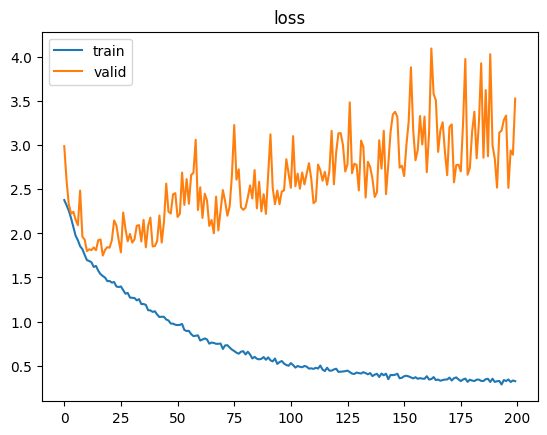

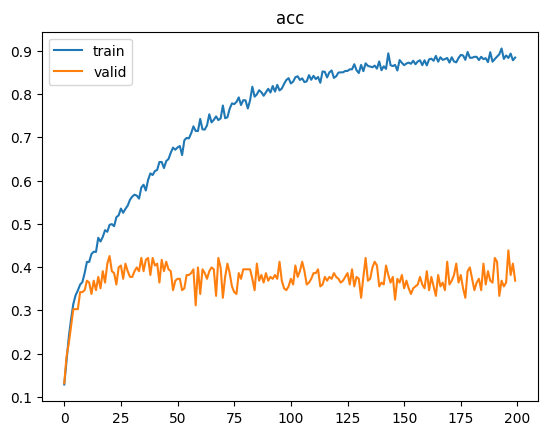

In [40]:
import matplotlib.pyplot as plt

plt.title("loss")
plt.plot(resnet50[0], label='train')
plt.plot(resnet50[1], label='valid')
plt.legend()
plt.show()

plt.title("acc")
plt.plot(resnet50[2], label='train')
plt.plot(resnet50[3], label='valid')
plt.legend()
plt.show()

In [41]:
print(resnet50)

[[2.377310112701359, 2.319040084689712, 2.2565938201765356, 2.1725949020263147, 2.0728957497249905, 1.973440632248027, 1.9223632350220805, 1.853155777616557, 1.821282765159137, 1.755252285251403, 1.696428522300005, 1.686557571710465, 1.6717077614983966, 1.6193514654964576, 1.6308555157987843, 1.5759237345745043, 1.5376197309116022, 1.5161678243206986, 1.498764951981257, 1.457891897396666, 1.4599839925255185, 1.4414183737826844, 1.448167480947375, 1.3980116277182875, 1.3913528902618784, 1.3976680313002061, 1.357246036445258, 1.3155672814543387, 1.32493139073117, 1.2716746925349918, 1.269644341816159, 1.2664209429950848, 1.2399515614639838, 1.2542145510184681, 1.1982171230924021, 1.1981818523391659, 1.1893518526220808, 1.1287266225756076, 1.12657260147722, 1.1094631979538274, 1.1161281215870005, 1.0790370928136563, 1.051047012744642, 1.0546136706285318, 1.0533015207932732, 1.0232103571383533, 1.0120463651581506, 0.9771386016226096, 0.9763024501386784, 0.9640767677109958, 0.95985125876009

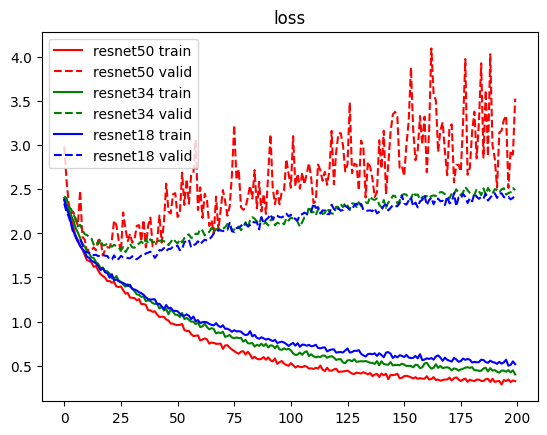

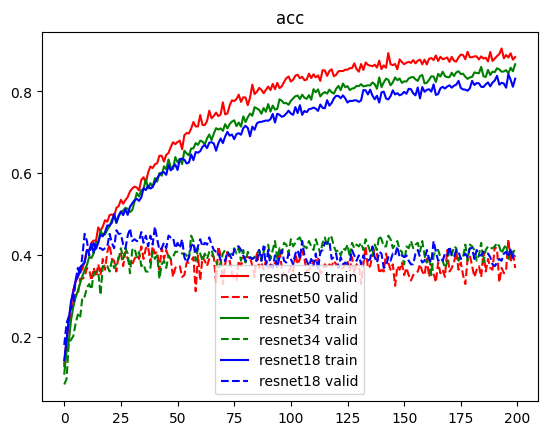

In [42]:
import matplotlib.pyplot as plt

plt.title("loss")
plt.plot(resnet50[0],'r-', label='resnet50 train')
plt.plot(resnet50[1],'r--', label='resnet50 valid')
plt.plot(resnet34[0],'g-', label='resnet34 train')
plt.plot(resnet34[1],'g--', label='resnet34 valid')
plt.plot(resnet18[0],'b-', label='resnet18 train')
plt.plot(resnet18[1],'b--', label='resnet18 valid')
plt.legend()
plt.show()

plt.title("acc")
plt.plot(resnet50[2],'r-', label='resnet50 train')
plt.plot(resnet50[3],'r--', label='resnet50 valid')
plt.plot(resnet34[2],'g-', label='resnet34 train')
plt.plot(resnet34[3],'g--', label='resnet34 valid')
plt.plot(resnet18[2],'b-', label='resnet18 train')
plt.plot(resnet18[3],'b--', label='resnet18 valid')
plt.legend()
plt.show()

### 4. Testing

In [43]:
import os
import torch
import torch.nn.functional as F
from tempfile import TemporaryDirectory
from time import time
from tqdm import tqdm 
import random

import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision.models as models
from torchvision import datasets, transforms
import timm

from PIL import Image
import matplotlib.pyplot as plt
import glob

* TODO : `{data_root}`에 압축푼 폴더 상위 폴더 입력
* TODO : `pjt_root`에 학습한 결과를 저장하고 싶은 경로 넣어주기

In [44]:
data_root = 'C:/Users/ /Documents/Image_classification/dataset/mini/08.cloud_classification'
pjt_root = 'C:/Users/ /Documents/Image_classification/project/m08.cloud_classification'
test_root = f'{data_root}/test'
test_file_list = glob.glob(f"{test_root}/*/*")
random.shuffle(test_file_list)

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda:0


In [45]:
test_data_transform = transforms.Compose([
        transforms.Resize(64),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])


image_test = datasets.ImageFolder(os.path.join(data_root, 'test'), test_data_transform)
test_dataloader = torch.utils.data.DataLoader(image_test, batch_size=16, shuffle=False, num_workers=0)
test_dataset_size = len(image_test)
class_names = image_test.classes

In [46]:
def test_model(model, criterion, dataloader, dataset_size, device):
    print(device)
    since = time()

    model.eval()   # Set model to evaluate mode

    running_loss = 0.0
    running_corrects = 0

    # Iterate over data.
    for inputs, labels in tqdm(dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        # statistics
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)


    epoch_loss = running_loss / dataset_size
    epoch_acc = running_corrects.double() / dataset_size

    time_elapsed = time() - since
    print(f'Test complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Acc: {epoch_acc:.4f} Loss: {epoch_loss:.4f}')

In [48]:
num_class = len(os.listdir(test_root))
resnet18_model = timm.create_model('resnet18',pretrained=False,num_classes=num_class).to(DEVICE)

cp_path = f"{pjt_root}/models/cloud_resnet18.pth"
resnet18_model.load_state_dict(torch.load(cp_path, map_location=DEVICE))

<All keys matched successfully>

In [49]:
criterion = nn.CrossEntropyLoss()
test_model(resnet18_model, criterion, test_dataloader, test_dataset_size, DEVICE)

cuda:0


100%|██████████| 15/15 [00:02<00:00,  7.43it/s]

Test complete in 0m 2s
Acc: 0.4342 Loss: 1.6869


In [50]:
num_class = len(os.listdir(test_root))
resnet34_model = timm.create_model('resnet34',pretrained=False,num_classes=num_class).to(DEVICE)

cp_path = f"{pjt_root}/models/cloud_resnet34.pth"
resnet34_model.load_state_dict(torch.load(cp_path, map_location=DEVICE))

<All keys matched successfully>

In [51]:
criterion = nn.CrossEntropyLoss()
test_model(resnet34_model, criterion, test_dataloader, test_dataset_size, DEVICE)

cuda:0


100%|██████████| 15/15 [00:00<00:00, 24.70it/s]

Test complete in 0m 1s
Acc: 0.4430 Loss: 1.9303


In [53]:
num_class = len(os.listdir(test_root))
resnet50_model = timm.create_model('resnet50',pretrained=False,num_classes=num_class).to(DEVICE)

cp_path = f"{pjt_root}/models/cloud_resnet50.pth"
resnet50_model.load_state_dict(torch.load(cp_path, map_location=DEVICE))

<All keys matched successfully>

In [54]:
criterion = nn.CrossEntropyLoss()
test_model(resnet50_model, criterion, test_dataloader, test_dataset_size, DEVICE)

cuda:0


100%|██████████| 15/15 [00:00<00:00, 26.02it/s]

Test complete in 0m 1s
Acc: 0.3816 Loss: 2.6528


### 5. Inference

In [55]:
idx = 10

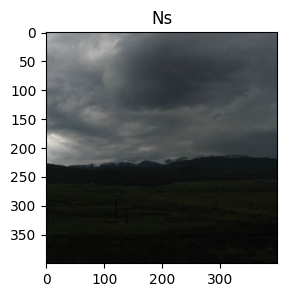

In [56]:
test_img_path = os.path.join(test_root, test_file_list[idx])
ori_img = Image.open(test_img_path).convert('RGB')
image = test_data_transform(ori_img)
x_tensor = image.to(DEVICE).unsqueeze(0)

outputs = resnet18_model(x_tensor)
_, y_pred = torch.max(outputs, 1)

plt.figure(figsize = (3,3))
plt.title(class_names[y_pred])
plt.imshow(ori_img)
plt.show()

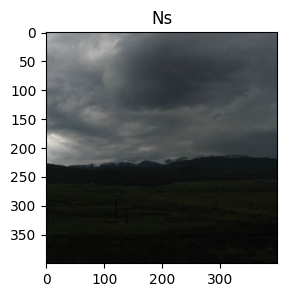

In [57]:
test_img_path = os.path.join(test_root, test_file_list[idx])
ori_img = Image.open(test_img_path).convert('RGB')
image = test_data_transform(ori_img)
x_tensor = image.to(DEVICE).unsqueeze(0)

outputs = resnet34_model(x_tensor)
_, y_pred = torch.max(outputs, 1)

plt.figure(figsize = (3,3))
plt.title(class_names[y_pred])
plt.imshow(ori_img)
plt.show()

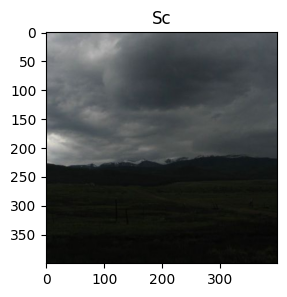

In [58]:
test_img_path = os.path.join(test_root, test_file_list[idx])
ori_img = Image.open(test_img_path).convert('RGB')
image = test_data_transform(ori_img)
x_tensor = image.to(DEVICE).unsqueeze(0)

outputs = resnet50_model(x_tensor)
_, y_pred = torch.max(outputs, 1)

plt.figure(figsize = (3,3))
plt.title(class_names[y_pred])
plt.imshow(ori_img)
plt.show()